In [83]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import free_fermion_representation as f
import PhaseDiagram as PD


import importlib
importlib.reload(site)
importlib.reload(honey)
importlib.reload(f)
importlib.reload(PD)

<module 'PhaseDiagram' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/PhaseDiagram.py'>

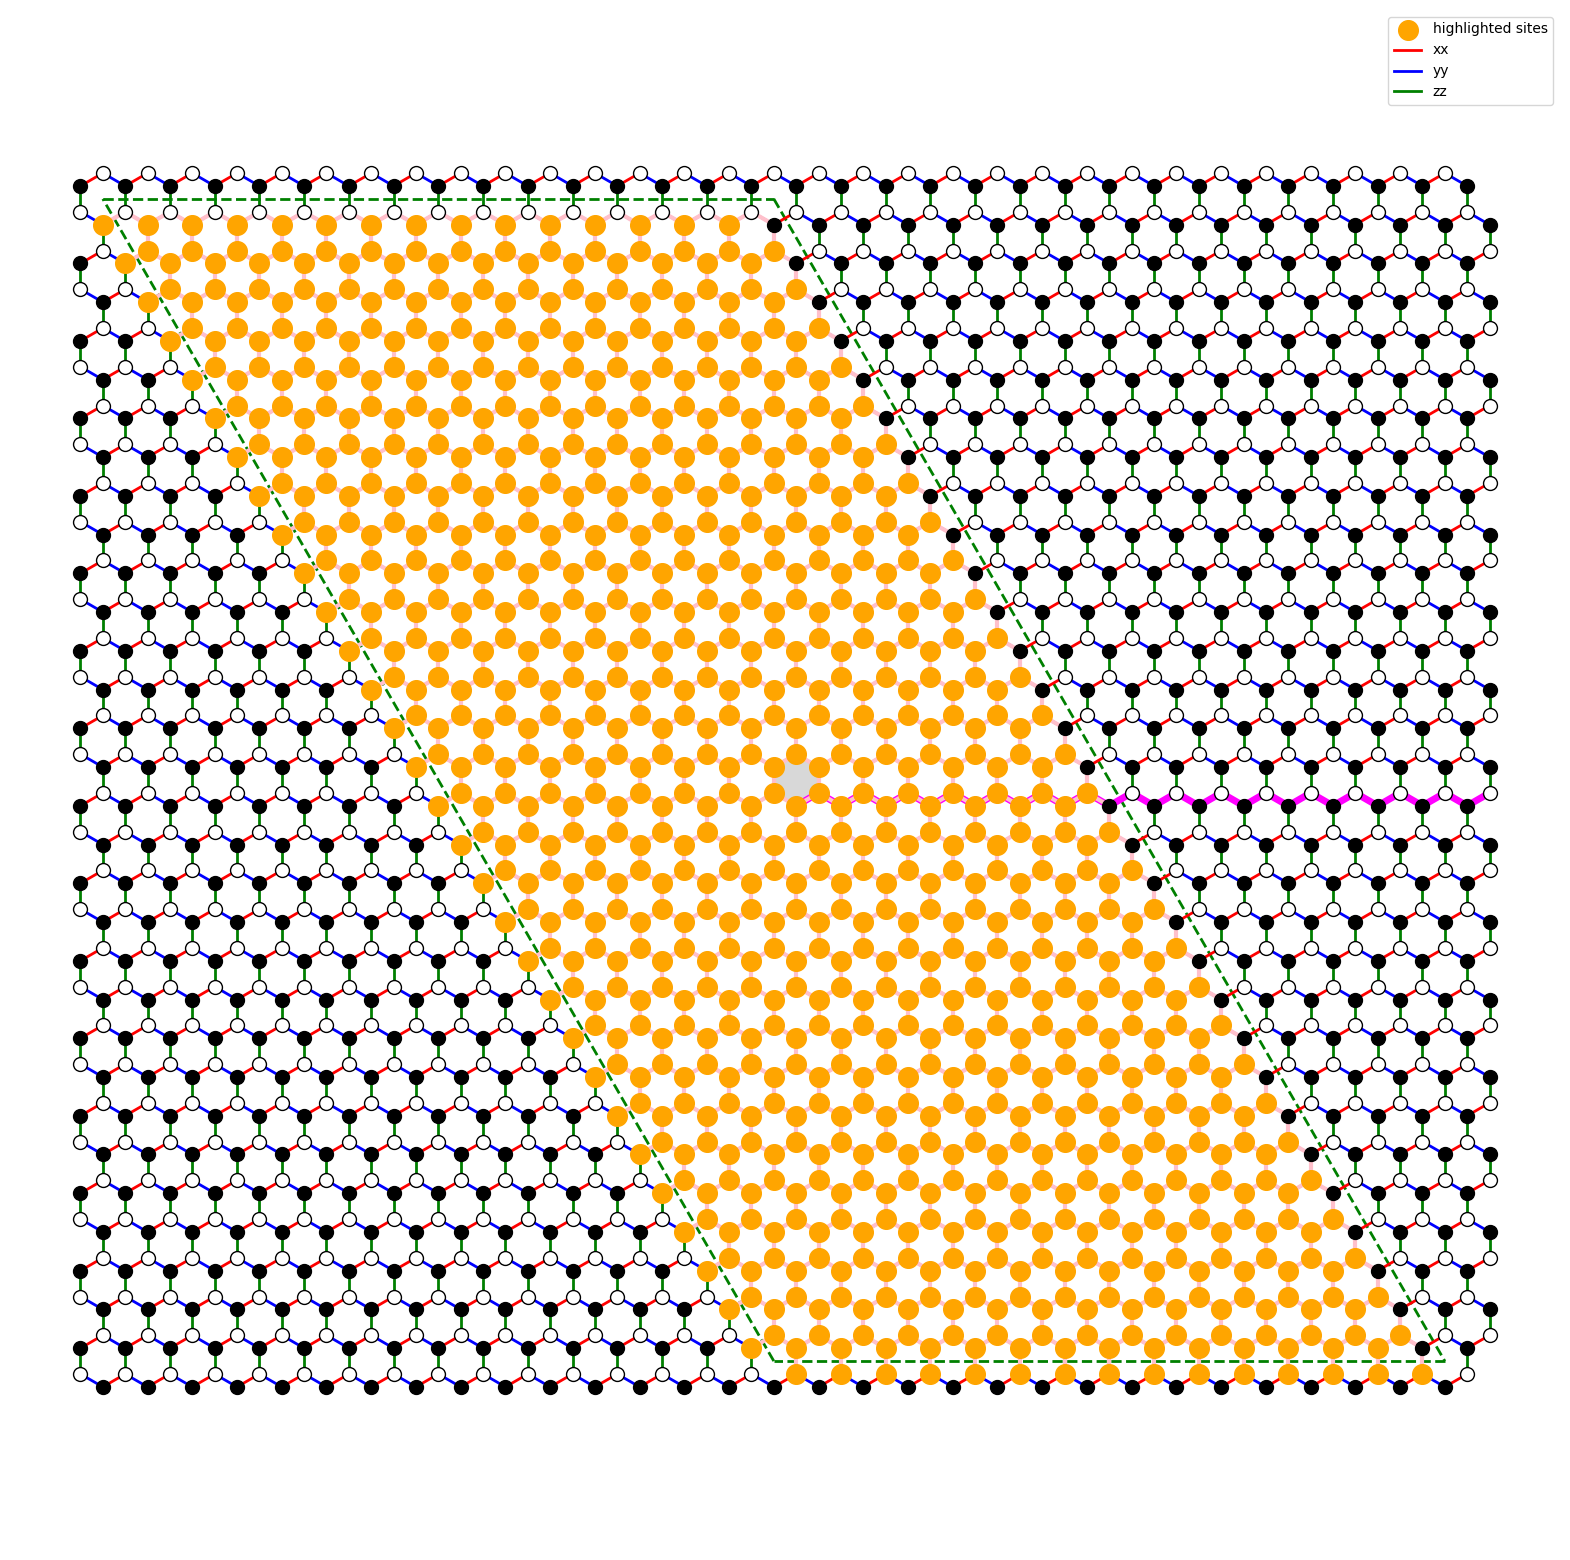

In [84]:
model = site.SitesOBC(Npx = 31, Npy = 31, edge = False)

prefactor, loop_indices, links_list, _ = model.get_loop()

central_plaquette = model.get_anyonbonds()[1]

honey.plot_honeycomb(model, plot_anyon_bonds = True,
                    sites = loop_indices, dotsize = 200,
                    loop = True,
                    plot_diagonal_bonds=False,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list
                    )

In [85]:
print(model.Nsites)

2046


In [87]:
fgs = f.FermionicGaussianRepresentation(model)


In [75]:
delta = 0.1
T = 0.8
N_cycles = 14

In [76]:
orderpar = PD.order_parameter_delta_T_method1(model, fgs, delta, T, N_cycles, edgepar = None)[0]

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


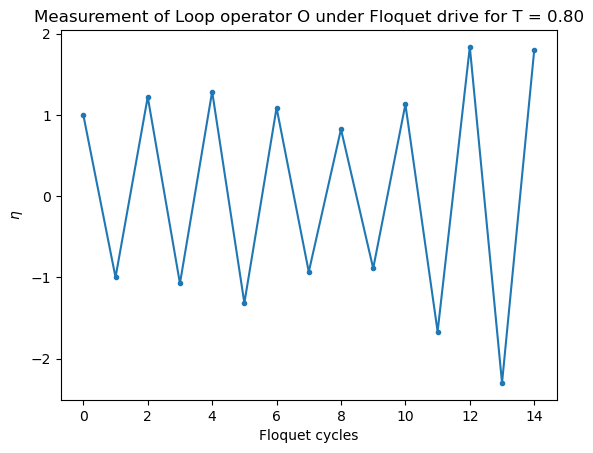

In [77]:
plt.plot(range(N_cycles+1), orderpar, '.-')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title(f"Measurement of Loop operator O under Floquet drive for T = {T:.2f}")
plt.show()

## 2D Phase Diagram

We run the big function!

In [88]:
# delta_list = [0, 0.01, 0.02, 0.03, 0.04]
T_list = np.linspace(1,0.1,10).tolist()

delta_list = [0,0.1,0.2,0.3]
N_cycles = 10

In [ ]:
freqs, N_list, data_grid = PD.phase_diagram_slow(model, T_list, delta_list, 
                                                 N_shots = 10, 
                                                 N_cycles = N_cycles, 
                                                 method = '1', 
                                                 save_dir = "op_1_noedge", 
                                                 general_dir= "phasediagram_fast")

Deltas:   0%|          | 0/4 [00:00<?, ?it/s]

T for delta=0:   0%|          | 0/10 [00:00<?, ?it/s]

T for delta=0.1:   0%|          | 0/10 [00:00<?, ?it/s]

delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  0.9
delta:  0.1 ;   T:  0.9
delta:  0.1 ;   T:  0.9
delta:  0.1 ;   T:  0.9
delta:  0.1 ;   T:  0.9
delta:  0.1 ;   T:  0.9
delta:  0.1 ;   T:  0.9
delta:  0.1 ;   T:  0.9


In [ ]:
freqs_fast, N_list_fast, data_grid_fast = PD.phase_diagram_fast(model, T_list, delta_list, N_cycles, 
                                                                      N_shots = 10, 
                                                                      method = '1',
                                                                      n_jobs = 5,
                                                                      save_dir = "op_1_noedge")

Computing 40 (delta, T) points: 0it [00:00, ?it/s]

Computing missing entries:   0%|          | 0/30 [00:00<?, ?it/s]

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Save the data if wanted (doit = True)

In [ ]:
PD.save(data_grid, 'data_grid_slow', doit = True)
PD.save(data_grid_fast, 'data_grid_fast', doit = False)

Load it if wanted (doit = True)

In [ ]:
data_grid_loaded = PD.load("data_grid_fast", doit = True)

OSError: [Errno 63] File name too long: "[[{'op_real': [np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j), np.complex128(-1+0j), np.complex128(1+0j)], 'op_ft': array([0.11461349+0.j        , 0.11462944-0.01721441j,\n         0.11468024-0.03523599j, 0.11477592-0.05503154j,\n         0.11493815-0.07795974j, 0.11521191-0.10621187j,\n         0.11569691-0.14382218j, 0.11664337-0.19946644j,\n         0.11880347-0.29660157j, 0.1267174 -0.53900122j,\n         1.1818843 -1.4080786j , 1.1818843 +1.4080786j ,\n         0.1267174 +0.53900122j, 0.11880347+0.29660157j,\n         0.11664337+0.19946644j, 0.11569691+0.14382218j,\n         0.11521191+0.10621187j, 0.11493815+0.07795974j,\n         0.11477592+0.05503154j, 0.11468024+0.03523599j,\n         0.11462944+0.01721441j]), 'result': np.float64(1.0672708090645613)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0000000000000004+8.571049753368158e-31j), np.complex128(0.9999999999999926-3.317575184938508e-30j), np.complex128(-0.9999999999999915+1.1461461163203798e-30j), np.complex128(0.9999999999999901+1.5697697480575534e-31j), np.complex128(-1.0000000000000207-4.148081672745448e-31j), np.complex128(0.9999999999999993-3.29926743353242e-30j), np.complex128(-0.9999999999999967+1.196536838310644e-30j), np.complex128(0.9999999999996174-8.929808781269456e-31j), np.complex128(-0.9999999999996991-2.242893219980014e-30j), np.complex128(0.9999999999880932+1.206933479783424e-30j), np.complex128(-0.9999999999848096+4.943620103766433e-31j), np.complex128(0.9999999998762457-3.1894321780667863e-31j), np.complex128(-0.999999999770388+1.72528708150996e-30j), np.complex128(0.9999999992855465-8.450342665515676e-30j), np.complex128(-0.999999998064563+3.0469489328886498e-30j), np.complex128(0.9999999972152306-1.4598030360876226e-31j), np.complex128(-0.9999999888721086-2.082439604044621e-30j), np.complex128(0.999999991943319+6.253038185036413e-31j), np.complex128(-0.9999999517198086-2.1193938728799037e-30j), np.complex128(0.9999999813036999-2.0040886217059518e-30j)], 'op_ft': array([0.11461349-1.27382334e-30j, 0.11462944-1.72144111e-02j,\n         0.11468024-3.52359903e-02j, 0.11477592-5.50315432e-02j,\n         0.11493815-7.79597432e-02j, 0.11521191-1.06211865e-01j,\n         0.11569691-1.43822181e-01j, 0.11664337-1.99466436e-01j,\n         0.11880346-2.96601566e-01j, 0.1267174 -5.39001219e-01j,\n         1.1818843 -1.40807860e+00j, 1.1818843 +1.40807860e+00j,\n         0.1267174 +5.39001219e-01j, 0.11880346+2.96601566e-01j,\n         0.11664337+1.99466436e-01j, 0.11569691+1.43822181e-01j,\n         0.11521191+1.06211865e-01j, 0.11493815+7.79597432e-02j,\n         0.11477592+5.50315432e-02j, 0.11468024+3.52359903e-02j,\n         0.11462944+1.72144111e-02j]), 'result': np.float64(1.0672708099868835)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1-2.2066257037247385e-30j), np.complex128(1.000000000000005+1.689104747374665e-30j), np.complex128(-0.9999999999999931+2.1755453826824883e-30j), np.complex128(1.0000000000000018+5.802908927125032e-32j), np.complex128(-1.0000000000000213+8.229847678133947e-31j), np.complex128(0.9999999999999801+1.3936433872123366e-30j), np.complex128(-1.000000000000014+1.3261924819446426e-30j), np.complex128(0.9999999947572205-1.2668240390427943e-30j), np.complex128(-0.9999999831402323+2.7589174895428788e-30j), np.complex128(0.9999999254046161-1.8507184069972464e-30j), np.complex128(-0.9999994865278257-1.4657895923829853e-30j), np.complex128(0.9999996988446987-6.057815741314391e-30j), np.complex128(-0.9999951007585061+1.2282903647503707e-30j), np.complex128(0.9999988389377331-2.1938921002179947e-30j), np.complex128(-0.9999762271122572+2.0723550784273526e-30j), np.complex128(0.9999890988196555-1.7023006977276983e-30j), np.complex128(-0.9999279810977729-1.8910383263356934e-31j), np.complex128(0.999929238692852+9.062360742832677e-31j), np.complex128(-0.9998460650780218+2.0130104268884706e-30j), np.complex128(0.9997222537381544-2.32085204734065e-30j)], 'op_ft': array([0.11461395+2.91589362e-31j, 0.11462747-1.72163013e-02j,\n         0.11467662-3.52354903e-02j, 0.11477355-5.50295476e-02j,\n         0.11493653-7.79576793e-02j, 0.11521052-1.06209606e-01j,\n         0.11569567-1.43819469e-01j, 0.11664236-1.99462905e-01j,\n         0.11880311-2.96596365e-01j, 0.12672056-5.38993604e-01j,\n         1.18189448-1.40807396e+00j, 1.18189448+1.40807396e+00j,\n         0.12672056+5.38993604e-01j, 0.11880311+2.96596365e-01j,\n         0.11664236+1.99462905e-01j, 0.11569567+1.43819469e-01j,\n         0.11521052+1.06209606e-01j, 0.11493653+7.79576793e-02j,\n         0.11477355+5.50295476e-02j, 0.11467662+3.52354903e-02j,\n         0.11462747+1.72163013e-02j]), 'result': np.float64(1.067280533581424)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1+2.4705280865232892e-30j), np.complex128(0.9999999999999908-2.3823074214571506e-30j), np.complex128(-0.9999999999999891+6.633188422508877e-31j), np.complex128(0.9999999999999973-4.494572661176274e-30j), np.complex128(-1.0000000000000102-1.9946102499926205e-30j), np.complex128(1.0000000000000042-2.3974012094579323e-30j), np.complex128(-1.0000000000000313+1.6586135177079424e-30j), np.complex128(0.9999990028541312+1.4697263469784204e-30j), np.complex128(-0.9999935067581194+3.7039530625543956e-30j), np.complex128(0.999996449208581+7.997176560133015e-31j), np.complex128(-0.9998989944830574-3.248131037504888e-30j), np.complex128(0.999938202412768-5.92759477446178e-34j), np.complex128(-0.9995697736905225-1.6189734702951807e-30j), np.complex128(0.9992651056957292+2.5623687493004697e-30j), np.complex128(-0.9990747151715883-2.3897273767353585e-30j), np.complex128(0.9970381027974781+1.3264938062688089e-30j), np.complex128(-0.997688812005793+9.130368219415233e-31j), np.complex128(0.9931910963676135-2.340370162788604e-30j), np.complex128(-0.9921691481339981-2.169178830411678e-30j), np.complex128(0.9857732627817191-9.965820319549668e-31j)], 'op_ft': array([0.11440771-8.80944956e-31j, 0.11447213-1.70974812e-02j,\n         0.11465886-3.51291686e-02j, 0.11472832-5.50164793e-02j,\n         0.11483943-7.79042616e-02j, 0.11512164-1.06116861e-01j,\n         0.11561434-1.43691690e-01j, 0.11657729-1.99290572e-01j,\n         0.11874718-2.96349711e-01j, 0.12681051-5.38535471e-01j,\n         1.1825143 -1.40773078e+00j, 1.1825143 +1.40773078e+00j,\n         0.12681051+5.38535471e-01j, 0.11874718+2.96349711e-01j,\n         0.11657729+1.99290572e-01j, 0.11561434+1.43691690e-01j,\n         0.11512164+1.06116861e-01j, 0.11483943+7.79042616e-02j,\n         0.11472832+5.50164793e-02j, 0.11465886+3.51291686e-02j,\n         0.11447213+1.70974812e-02j]), 'result': np.float64(1.068106592096479)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9999999999999986-5.804820006263372e-30j), np.complex128(0.9999999999999977+1.9033248722672287e-30j), np.complex128(-0.9999999999999907-5.876386784828069e-30j), np.complex128(0.9999999999999843+1.4724712006659025e-30j), np.complex128(-1-3.1028042658636905e-30j), np.complex128(0.9999999999999823+2.0800116979239225e-31j), np.complex128(-0.99999999999999+9.081051973878991e-31j), np.complex128(0.9999687646527956-2.159477096502914e-30j), np.complex128(-0.9996896484996435-5.751331443374568e-31j), np.complex128(0.9997986463030277-2.0585744151520124e-30j), np.complex128(-0.9982891468819703-8.917108741637428e-31j), np.complex128(0.9960198680055518-2.1527017375111064e-30j), np.complex128(-0.9957783049267716+9.228448158587356e-31j), np.complex128(0.9850532056709612+9.803289754786045e-31j), np.complex128(-0.9789409278862672-1.687895845564036e-30j), np.complex128(0.9584519585913684-1.176507954801303e-30j), np.complex128(-0.9348441297396524+7.797706841956655e-31j), np.complex128(0.9115674635566329-3.8449331887388223e-31j), np.complex128(-0.8884914471220154+1.2475557166106587e-30j), np.complex128(0.8717131978078235-1.1654891835869507e-30j)], 'op_ft': array([0.11352264-2.98821197e-30j, 0.11407421-1.67781272e-02j,\n         0.11410461-3.54365928e-02j, 0.11363477-5.46121413e-02j,\n         0.11432278-7.73840426e-02j, 0.11439115-1.05628282e-01j,\n         0.11487979-1.43090143e-01j, 0.11526197-1.98485157e-01j,\n         0.11666232-2.94021063e-01j, 0.12637453-5.32144441e-01j,\n         1.19082038-1.40217800e+00j, 1.19082038+1.40217800e+00j,\n         0.12637453+5.32144441e-01j, 0.11666232+2.94021063e-01j,\n         0.11526197+1.98485157e-01j, 0.11487979+1.43090143e-01j,\n         0.11439115+1.05628282e-01j, 0.11432278+7.73840426e-02j,\n         0.11363477+5.46121413e-02j, 0.11410461+3.54365928e-02j,\n         0.11407421+1.67781272e-02j]), 'result': np.float64(1.0772977459597788)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.000000000000001+8.116611144967907e-31j), np.complex128(1.0000000000000044-2.560657157948582e-30j), np.complex128(-1.0000000000000062-1.5447955397241225e-31j), np.complex128(0.9999999999999869+1.226015827281518e-31j), np.complex128(-1.0000000000000047-1.694274120074559e-30j), np.complex128(0.9999999999999878-3.195206469986055e-30j), np.complex128(-1.0000000000001141+2.3886426479132685e-30j), np.complex128(0.9996797771697689-2.49012183728871e-30j), np.complex128(-0.9958836509451863-2.550849441365536e-30j), np.complex128(0.9933126939955026-1.561686206836795e-30j), np.complex128(-0.9900900186263585-2.3280615030686502e-31j), np.complex128(0.9637034978605962-1.6160528303555144e-30j), np.complex128(-0.9322474265640849+2.408078052341357e-31j), np.complex128(0.8789101248948771+3.1675493038127088e-31j), np.complex128(-0.8319452819812645+2.101300935705092e-30j), np.complex128(0.793914520143789-2.1885083600581113e-30j), np.complex128(-0.7534273314817579-1.0225436988408624e-30j), np.complex128(0.735317933704836-5.475199149937173e-31j), np.complex128(-0.6872672189677419+5.076884605424387e-31j), np.complex128(0.8742345868260565-2.8576009217787436e-30j)], 'op_ft': array([0.11521008-1.85241531e-30j, 0.11613618-1.77276858e-02j,\n         0.11437464-3.73333289e-02j, 0.1143627 -5.56722930e-02j,\n         0.11348126-7.96137325e-02j, 0.11374097-1.07073316e-01j,\n         0.11161148-1.44064999e-01j, 0.11526851-1.97658202e-01j,\n         0.11188492-3.00095710e-01j, 0.10785668-5.18950527e-01j,\n         1.21496548-1.37422956e+00j, 1.21496548+1.37422956e+00j,\n         0.10785668+5.18950527e-01j, 0.11188492+3.00095710e-01j,\n         0.11526851+1.97658202e-01j, 0.11161148+1.44064999e-01j,\n         0.11374097+1.07073316e-01j, 0.11348126+7.96137325e-02j,\n         0.1143627 +5.56722930e-02j, 0.11437464+3.73333289e-02j,\n         0.11613618+1.77276858e-02j]), 'result': np.float64(1.0997553982321107)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0000000000000024-1.616776914161774e-30j), np.complex128(0.9999999999999949-1.1032283289738718e-30j), np.complex128(-1.0000000000000042-2.4407487997556224e-30j), np.complex128(1.0000000000000042-9.833526490095606e-31j), np.complex128(-0.9999999999988363-6.984647822979865e-31j), np.complex128(1.0000000004243623+2.4548352021669605e-30j), np.complex128(-1.0000000048773148+2.0278356803741364e-30j), np.complex128(0.9984909315620404-2.884375139381669e-31j), np.complex128(-0.9769138744123345+2.090893376644506e-30j), np.complex128(0.935457729710386+1.5338881255771334e-30j), np.complex128(-0.8693483672162123-2.2731754815506742e-30j), np.complex128(0.7650010713751979-8.119678752079347e-31j), np.complex128(-0.6823907134844373+1.448385251880699e-30j), np.complex128(0.6220911067115072+1.771048397208784e-30j), np.complex128(-0.5597428849923777+1.9468567802949813e-31j), np.complex128(0.5080513944542613-5.338568610503634e-31j), np.complex128(-0.4561245571942783+9.8416052203379e-31j), np.complex128(0.4307288095201479+1.9631726465480011e-31j), np.complex128(-0.3919779060097183+5.164126431561757e-32j), np.complex128(0.3511273788209574-1.0008255779571725e-30j)], 'op_ft': array([0.11105349-3.66542905e-31j, 0.11140752-1.67471033e-02j,\n         0.10985514-3.50596108e-02j, 0.11201517-5.22795786e-02j,\n         0.1097613 -7.68805431e-02j, 0.11173498-1.01478195e-01j,\n         0.11360455-1.41371077e-01j, 0.10545397-1.92143578e-01j,\n         0.12999587-2.94582515e-01j, 0.06137931-5.22488198e-01j,\n         1.27055329-1.28536110e+00j, 1.27055329+1.28536110e+00j,\n         0.06137931+5.22488198e-01j, 0.12999587+2.94582515e-01j,\n         0.10545397+1.92143578e-01j, 0.11360455+1.41371077e-01j,\n         0.11173498+1.01478195e-01j, 0.1097613 +7.68805431e-02j,\n         0.11201517+5.22795786e-02j, 0.10985514+3.50596108e-02j,\n         0.11140752+1.67471033e-02j]), 'result': np.float64(1.1594997983048798)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0000000000000002-1.7733813294737865e-30j), np.complex128(0.9999999994473319-2.3269909879977376e-30j), np.complex128(-0.9999999190709761-1.8981858326179402e-30j), np.complex128(0.9999986395178344+3.0581062371374388e-30j), np.complex128(-0.9999285738827636-3.820404678290666e-30j), np.complex128(0.9998786131058597-8.437716812391973e-32j), np.complex128(-1.0120820056974855+4.852856290677481e-32j), np.complex128(0.9924417056348389-7.708600398005672e-31j), np.complex128(-0.8085157422362443-2.2895612088305736e-30j), np.complex128(0.4151816658939302+6.645350431723499e-31j), np.complex128(-0.43053267972910564+8.464525274625429e-31j), np.complex128(0.26647787649971516+4.137218775992387e-31j), np.complex128(-0.32000777041242756-4.269411987409772e-31j), np.complex128(0.20296188795663997-7.5745803274562145e-31j), np.complex128(-0.19867810372220523-3.1213741087129304e-31j), np.complex128(0.13895766925067923+1.276124706293476e-31j), np.complex128(-0.12624006656029146-3.9937970209597405e-32j), np.complex128(0.08177166975938337-4.9091786095897104e-32j), np.complex128(-0.06298159143138231+5.790497061252093e-31j), np.complex128(0.062207605670346236-6.832987067754908e-33j)], 'op_ft': array([ 0.08197767-1.65293962e-30j,  0.13376627-1.10155704e-02j,\n          0.09022042-3.99656976e-02j,  0.12745952-5.05301276e-02j,\n          0.09041911-6.98922799e-02j,  0.12837383-1.21092128e-01j,\n          0.0960535 -1.01910562e-01j,  0.10468885-2.47591810e-01j,\n          0.1502226 -2.11738276e-01j, -0.00831832-6.34446754e-01j,\n          1.33741324-1.05734801e+00j,  1.33741324+1.05734801e+00j,\n         -0.00831832+6.34446754e-01j,  0.1502226 +2.11738276e-01j,\n          0.10468885+2.47591810e-01j,  0.0960535 +1.01910562e-01j,\n          0.12837383+1.21092128e-01j,  0.09041911+6.98922799e-02j,\n          0.12745952+5.05301276e-02j,  0.09022042+3.99656976e-02j,\n          0.13376627+1.10155704e-02j]), 'result': np.float64(1.2554355636865344)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0000000000000013-1.994640642911054e-30j), np.complex128(-0.9256570950812797-2.0036873536907724e-30j), np.complex128(0.9984621188177721-2.4953857026460764e-30j), np.complex128(1.342755677213562-4.966559428510599e-31j), np.complex128(1.0870655717264375+1.8934006359761797e-30j), np.complex128(-5.730208643597323-1.1967344319898327e-29j), np.complex128(3.644678145966315+8.560636674232254e-30j), np.complex128(-0.3047527360477176-1.1287144527631596e-31j), np.complex128(4.271311642819082+3.5220282549983834e-29j), np.complex128(0.13732243810993722+1.9803349160363653e-31j), np.complex128(1.27960473194481+2.7513269680353528e-30j), np.complex128(-0.02802522555723071-4.380767530364423e-32j), np.complex128(0.6805979854118974-3.966197226804987e-31j), np.complex128(0.06147692971166105+2.7652435152201125e-32j), np.complex128(0.03916586414243259+1.4372424541355958e-32j), np.complex128(-0.052509662262769055+7.262063247054214e-32j), np.complex128(0.02724812103247483+1.5799197196836147e-32j), np.complex128(-0.030475601320878513-7.148605886926291e-32j), np.complex128(-0.8098925443436845-6.304943245785904e-30j), np.complex128(-0.0824959195837369-1.6143020154426796e-31j)], 'op_ft': array([ 0.71024594+2.63275053e-30j, -0.59792254+1.28314021e-01j,\n          0.57142055-2.41709501e-01j, -0.60695346+5.93378473e-01j,\n         -0.57774989-1.45080372e+00j,  1.50606743-8.46606142e-01j,\n          0.96120691+7.13352882e-01j, -0.38866853+4.93088688e-01j,\n         -0.09500914-1.08651076e+00j,  2.03316907+2.17533131e-02j,\n         -0.86939554+2.04136928e+00j, -0.86939554-2.04136928e+00j,\n          2.03316907-2.17533131e-02j, -0.09500914+1.08651076e+00j,\n         -0.38866853-4.93088688e-01j,  0.96120691-7.13352882e-01j,\n          1.50606743+8.46606142e-01j, -0.57774989+1.45080372e+00j,\n         -0.60695346-5.93378473e-01j,  0.57142055+2.41709501e-01j,\n         -0.59792254-1.28314021e-01j]), 'result': np.float64(0.15914959616016255)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9999974990272971-8.697527885392313e-31j), np.complex128(-0.9999416475749932-1.514902667292695e-30j), np.complex128(0.9575426486039018-7.756643861663623e-32j), np.complex128(1.780922632674606-2.464766034206995e-30j), np.complex128(0.5395046240847925+1.3206570996818878e-30j), np.complex128(-0.529668143806105-1.5209487035974737e-30j), np.complex128(0.5697294668898889+1.129295089275313e-31j), np.complex128(-1.0816698110473786+1.7755816207986116e-30j), np.complex128(0.05204575450138998-4.321636302165035e-32j), np.complex128(-5.175132784179072-3.779122617603315e-31j), np.complex128(-0.07143803337450527+1.0175678751267292e-31j), np.complex128(-0.04074828643018532+6.880814351888088e-32j), np.complex128(0.06137408962867635-2.298326602913641e-31j), np.complex128(0.08453917054508911+2.4735829934652574e-31j), np.complex128(0.022871538675630472+2.8991774345818486e-32j), np.complex128(-0.00028623206173468825-8.255367073978849e-34j), np.complex128(0.02512391654817663+1.7218255594922436e-32j), np.complex128(-0.1723153350812347+3.54042993682365e-31j), np.complex128(0.005344466209623854+1.2591554364570345e-32j), np.complex128(0.0007096612148334957+2.0426230646803422e-33j)], 'op_ft': array([-0.2733537 -7.81046528e-31j,  0.72415366+1.94833395e-01j,\n         -0.94638409+4.00656411e-01j,  0.07433037-8.14588083e-01j,\n         -0.18121261-4.82753411e-01j,  1.06452985-8.43573766e-01j,\n          0.49623568+4.01588831e-01j,  0.62436119-5.97084816e-02j,\n         -0.15564299+4.23048795e-01j,  0.65346312-5.64405743e-01j,\n          0.07413051+8.32461232e-01j,  0.07413051-8.32461232e-01j,\n          0.65346312+5.64405743e-01j, -0.15564299-4.23048795e-01j,\n          0.62436119+5.97084816e-02j,  0.49623568-4.01588831e-01j,\n          1.06452985+8.43573766e-01j, -0.18121261+4.82753411e-01j,\n          0.07433037+8.14588083e-01j, -0.94638409-4.00656411e-01j,\n          0.72415366-1.94833395e-01j]), 'result': np.float64(-0.19922318292227212)}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ]\n [{'op_real': [np.complex128(1+0j), np.complex128(-0.9998692170072597-1.4946301137125136e-30j), np.complex128(0.9944177872984357+5.873196552639415e-31j), np.complex128(-0.996920914307693-8.353358207352517e-31j), np.complex128(0.991238367756228-1.440616442297991e-30j), np.complex128(-0.993508064024608+2.180063135592797e-30j), np.complex128(0.9879659959537004-1.2095964678860515e-30j), np.complex128(-0.9900051235674685+2.1295437473198556e-30j), np.complex128(0.984673721756288+2.259693991719522e-30j), np.complex128(-0.986412857174398+3.20917205491541e-30j), np.complex128(0.9812756369623145+2.5930081846143506e-30j), np.complex128(-0.9825883928272817+3.416942206697362e-30j), np.complex128(0.9776946585731308+2.0420541487878566e-31j), np.complex128(-0.9787288570604836+1.5763487647353777e-31j), np.complex128(0.9739222594663377-4.68571578019654e-30j), np.complex128(-0.9746525024277639+1.9044717221392826e-30j), np.complex128(0.9699887456364842-9.258214902541295e-30j), np.complex128(-0.9703268920814387+2.8579532840651118e-30j), np.complex128(0.9639856810750108-6.103056610048249e-32j), np.complex128(-0.9633266904187948-6.677288432939733e-30j), np.complex128(0.9603902973235905-1.1959210241805784e-30j)], 'op_ft': array([0.11065951+6.51581754e-31j, 0.11443864-1.90478064e-02j,\n         0.11490649-3.59067561e-02j, 0.11498775-5.53705888e-02j,\n         0.11514469-7.81106766e-02j, 0.11538328-1.06218763e-01j,\n         0.11587382-1.43650187e-01j, 0.11688512-1.99114159e-01j,\n         0.1193533 -2.96040190e-01j, 0.12873361-5.38101558e-01j,\n         1.1802514 -1.38861749e+00j, 1.1802514 +1.38861749e+00j,\n         0.12873361+5.38101558e-01j, 0.1193533 +2.96040190e-01j,\n         0.11688512+1.99114159e-01j, 0.11587382+1.43650187e-01j,\n         0.11538328+1.06218763e-01j, 0.11514469+7.81106766e-02j,\n         0.11498775+5.53705888e-02j, 0.11490649+3.59067561e-02j,\n         0.11443864+1.90478064e-02j]), 'result': np.float64(1.0695918891283887)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0096561130732562-1.6453962565214737e-30j), np.complex128(1.0149885374802636-2.997782530260779e-30j), np.complex128(-1.0238851320646207+2.5342846202081735e-30j), np.complex128(1.0333422458400345-7.413090138772339e-32j), np.complex128(-1.04066182999729+2.5076516393121195e-30j), np.complex128(1.047719907102555-6.9919034249168305e-31j), np.complex128(-1.050620425510456-2.1384308988012983e-30j), np.complex128(1.0563356970316098-1.836375997410934e-30j), np.complex128(-1.055771258089171-1.740597555759347e-30j), np.complex128(1.058718718089792-1.7753608514379465e-30j), np.complex128(-1.0564287906438934+1.1100298413284624e-30j), np.complex128(1.0570673001146234-1.9036724505791953e-30j), np.complex128(-1.0548624092331045-1.960491104145944e-30j), np.complex128(1.0531962205514909-1.8222634470343285e-30j), np.complex128(-1.051811494387016-8.55285066583006e-30j), np.complex128(1.0504577646384836-3.105191333957497e-30j), np.complex128(-1.0475036165692841-1.0750583648749172e-30j), np.complex128(1.0460382597031308+4.722556035093256e-31j), np.complex128(-1.0407688330986684+5.015869704541536e-31j), np.complex128(1.0473446939115996-1.8428088459209222e-30j)], 'op_ft': array([0.1150365 -1.93661053e-30j, 0.11346757-1.69485897e-02j,\n         0.11414769-3.61104347e-02j, 0.11425151-5.55595811e-02j,\n         0.11439067-7.86759200e-02j, 0.11482245-1.07169452e-01j,\n         0.11533986-1.44456947e-01j, 0.11572351-1.99553741e-01j,\n         0.11560997-2.95796990e-01j, 0.11019793-5.43228273e-01j,\n         1.20581844-1.47343618e+00j, 1.20581844+1.47343618e+00j,\n         0.11019793+5.43228273e-01j, 0.11560997+2.95796990e-01j,\n         0.11572351+1.99553741e-01j, 0.11533986+1.44456947e-01j,\n         0.11482245+1.07169452e-01j, 0.11439067+7.86759200e-02j,\n         0.11425151+5.55595811e-02j, 0.11414769+3.61104347e-02j,\n         0.11346757+1.69485897e-02j]), 'result': np.float64(1.0907819345848688)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.999256288238407-2.09910313776623e-30j), np.complex128(1.0233438406687136-1.0575772128111866e-30j), np.complex128(-1.0166473694331315-2.6291460395074067e-32j), np.complex128(1.0537329796090236-2.142555876031433e-31j), np.complex128(-1.0328828575255724-1.3651722448367423e-30j), np.complex128(1.0754793664497309-2.3224953428606875e-30j), np.complex128(-1.0453545379623914-1.5333206634920455e-30j), np.complex128(1.0851301375995115-3.0054879803396603e-30j), np.complex128(-1.05153284176758-1.8686465597446283e-31j), np.complex128(1.0814145373505595+2.9061202135838502e-30j), np.complex128(-1.0643789954541067-1.1024251320001012e-30j), np.complex128(1.087617455179367+1.9619768133944526e-31j), np.complex128(-1.1181750184942987+9.629655559067353e-30j), np.complex128(1.3615204365774174-1.0865153100199238e-30j), np.complex128(-0.4719421926979748+1.1848440321373292e-30j), np.complex128(0.7755793029680894-2.550066174639272e-30j), np.complex128(-0.8297407077935237+5.510018984086734e-30j), np.complex128(0.8296120921521434-2.0445715200858345e-31j), np.complex128(-0.8377478250645315-1.8187234155947738e-30j), np.complex128(0.8332911296931038-2.812728617841584e-31j)], 'op_ft': array([0.170646  -1.16565362e-30j, 0.09858207-3.14632604e-02j,\n         0.08449293-1.32268836e-02j, 0.14273042-3.82037112e-02j,\n         0.11719976-1.10419991e-01j, 0.08122716-9.66481495e-02j,\n         0.13184132-1.13803262e-01j, 0.1329733 -2.23502911e-01j,\n         0.07968575-2.99864938e-01j, 0.09897396-5.05605095e-01j,\n         1.23825818-1.47067320e+00j, 1.23825818+1.47067320e+00j,\n         0.09897396+5.05605095e-01j, 0.07968575+2.99864938e-01j,\n         0.1329733 +2.23502911e-01j, 0.13184132+1.13803262e-01j,\n         0.08122716+9.66481495e-02j, 0.11719976+1.10419991e-01j,\n         0.14273042+3.82037112e-02j, 0.08449293+1.32268836e-02j,\n         0.09858207+3.14632604e-02j]), 'result': np.float64(1.0676121884998415)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9975087510878782+1.3034055212450806e-30j), np.complex128(1.0544072122861934+2.337614436100724e-30j), np.complex128(-1.0225623339970702+5.1835537075826e-32j), np.complex128(1.0546263590994664-3.3140117637694836e-30j), np.complex128(-1.0603397085455613+2.890071579891637e-30j), np.complex128(1.0618836574786756-1.85702841142419e-30j), np.complex128(-1.054766406286871+5.536197853069101e-32j), np.complex128(1.0529557728328607+3.123285507985767e-31j), np.complex128(-0.8455711804359338-2.099121695052407e-30j), np.complex128(1.037894066312974+1.1219131104264862e-30j), np.complex128(-0.9054729481758322-2.111151085847662e-30j), np.complex128(0.8308937205017839+3.4657164809585364e-33j), np.complex128(-0.6994710202208595-7.648734351159643e-31j), np.complex128(0.7233259334912546+1.6271512123441332e-30j), np.complex128(-0.7361815728559532-7.727172383210671e-32j), np.complex128(0.7878946560512147-4.5277881914791183e-32j), np.complex128(-0.8308215026499849-1.63668818430142e-32j), np.complex128(0.9024061936806994+2.7018987701081848e-30j), np.complex128(-0.942445910559686-1.239924670595686e-30j), np.complex128(1.052977198452763-3.5384882797907175e-31j)], 'op_ft': array([0.16271317+1.43196625e-31j, 0.09528267-1.87409580e-03j,\n         0.13845197-4.10398946e-02j, 0.10351681-2.44038970e-02j,\n         0.10375834-9.68780947e-02j, 0.12073023-8.45209625e-02j,\n         0.09468113-1.64822681e-01j, 0.12419797-1.88168495e-01j,\n         0.11637311-3.00309929e-01j, 0.05269295-5.92872015e-01j,\n         1.26024609-1.36355168e+00j, 1.26024609+1.36355168e+00j,\n         0.05269295+5.92872015e-01j, 0.11637311+3.00309929e-01j,\n         0.12419797+1.88168495e-01j, 0.09468113+1.64822681e-01j,\n         0.12073023+8.45209625e-02j, 0.10375834+9.68780947e-02j,\n         0.10351681+2.44038970e-02j, 0.13845197+4.10398946e-02j,\n         0.09528267+1.87409580e-03j]), 'result': np.float64(1.0975329133667049)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.005083339624817+2.8320206395731867e-30j), np.complex128(1.0765991244466424+8.340732658863716e-31j), np.complex128(-0.9872431000312093-3.895954428805413e-31j), np.complex128(0.9672646933699033+1.0206983632140424e-30j), np.complex128(-0.8301316406833538-3.306672208212041e-30j), np.complex128(0.7051516079135615-9.150911791140425e-32j), np.complex128(-1.1114764919387374-7.143193079561439e-31j), np.complex128(2.364744327247054-4.028274218491748e-30j), np.complex128(-1.3483979994783037-3.0754136770384683e-30j), np.complex128(1.2015589723211997+3.674915191628404e-32j), np.complex128(-1.1121295979040877+2.043460389434418e-30j), np.complex128(0.9929095145766611-2.5070792870225178e-30j), np.complex128(-0.9804352361564093-8.885487043962454e-31j), np.complex128(1.0043861157605536-8.598929724927289e-31j), np.complex128(-1.0770031124964023-1.3322328725741313e-30j), np.complex128(1.2632518142265858+1.771603234802025e-30j), np.complex128(-1.3915932191261253-3.0893692153943212e-30j), np.complex128(1.5446865280126933+1.0733769187653878e-30j), np.complex128(-1.4357692038346284-1.2527112152239094e-31j), np.complex128(1.2640331821986888-1.9202819774434405e-30j)], 'op_ft': array([ 0.25155973-9.52493573e-31j,  0.03851122+6.72976497e-02j,\n          0.14379066-1.47074385e-01j,  0.17589388+9.32028277e-02j,\n         -0.06071038-1.29295679e-01j,  0.2800569 -2.01410510e-01j,\n          0.06763535+8.37100078e-02j, -0.07493513-3.88668624e-01j,\n          0.42306525-3.66370631e-01j, -0.01414195-3.90131526e-01j,\n          1.18634219-1.63451455e+00j,  1.18634219+1.63451455e+00j,\n         -0.01414195+3.90131526e-01j,  0.42306525+3.66370631e-01j,\n         -0.07493513+3.88668624e-01j,  0.06763535-8.37100078e-02j,\n          0.2800569 +2.01410510e-01j, -0.06071038+1.29295679e-01j,\n          0.17589388-9.32028277e-02j,  0.14379066+1.47074385e-01j,\n          0.03851122-6.72976497e-02j]), 'result': np.float64(0.9347824581452434)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9269252912102062-1.6332102751283286e-30j), np.complex128(0.8130757738018989-8.539509396592544e-31j), np.complex128(-0.8350304916818301-1.023183915051386e-30j), np.complex128(0.7461436726755213-5.522163368253044e-30j), np.complex128(-0.5698101576774829+3.22044179574908e-30j), np.complex128(0.9192664865425826+1.944056570191488e-30j), np.complex128(-0.494764834820923+8.269129019488424e-31j), np.complex128(-1.0187360456230916+2.6638255005841282e-31j), np.complex128(3.2383415703236227+5.938259422108643e-30j), np.complex128(1.223387606584001-9.887351071930601e-31j), np.complex128(-1.023241479444802-4.796653525308303e-32j), np.complex128(1.0225704035187724+9.388481310366793e-31j), np.complex128(-1.8799963304559675-1.8352465907678628e-29j), np.complex128(0.4745325978617291-1.0665436143484382e-30j), np.complex128(-0.575774363640577+1.034618339424017e-30j), np.complex128(-0.2972927060629312+3.9972805025119765e-32j), np.complex128(0.4553940687881529+3.7466573787807456e-31j), np.complex128(-0.2120160507187193+4.10637464752934e-31j), np.complex128(-1.406494664586736+4.979706227712907e-30j), np.complex128(0.3713279474540831+4.060011341044179e-31j)], 'op_ft': array([ 0.36818895-1.15646566e-30j, -0.18328787+1.97653364e-01j,\n          0.36886568-3.06793665e-01j, -0.17019963+2.44865848e-01j,\n          0.39024445-4.71786961e-01j,  0.16540544+4.39060431e-01j,\n         -0.20822265-6.00533463e-01j,  0.79241087-2.96859716e-02j,\n         -0.66234396-2.45603547e-01j,  0.78143291-7.21040639e-01j,\n          0.83288813-4.28557496e-01j,  0.83288813+4.28557496e-01j,\n          0.78143291+7.21040639e-01j, -0.66234396+2.45603547e-01j,\n          0.79241087+2.96859716e-02j, -0.20822265+6.00533463e-01j,\n          0.16540544-4.39060431e-01j,  0.39024445+4.71786961e-01j,\n         -0.17019963-2.44865848e-01j,  0.36886568+3.06793665e-01j,\n         -0.18328787-1.97653364e-01j]), 'result': np.float64(0.46469917699310975)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9583057555332417-2.4947116372848044e-30j), np.complex128(0.8192757811038583+5.14257604029711e-30j), np.complex128(-0.8268967853839835+1.970364042943282e-30j), np.complex128(1.0338840933524558-1.825966676946823e-30j), np.complex128(-0.44597782786183093+5.412002681257866e-31j), np.complex128(0.5126352310115142-2.4538861976775782e-30j), np.complex128(-0.6162654986403253+1.1224456628529182e-30j), np.complex128(0.7042622848566056-2.5162862748341143e-30j), np.complex128(-0.43403771936657876+5.756248921728265e-31j), np.complex128(0.7286779013330202-6.3603313346202945e-31j), np.complex128(-0.6683112665269533+1.2004519653358021e-30j), np.complex128(0.791030378074736+1.7683053010045053e-30j), np.complex128(-0.634838552466033+2.962003210178154e-31j), np.complex128(0.6245309479885582+1.2629520931322574e-30j), np.complex128(-0.5209765443120538+1.5703466713805478e-30j), np.complex128(0.5291577387018294+8.898821832538715e-31j), np.complex128(-0.3861640120566152+3.880780901653831e-31j), np.complex128(0.3217600972980692-3.320439133159064e-31j), np.complex128(-0.3166648732885067+8.776667026115158e-31j), np.complex128(0.3279137041067191-1.4579349649042081e-31j)], 'op_ft': array([0.23249449+5.64861137e-31j, 0.07800148+5.90383195e-02j,\n         0.06868344-2.10160782e-02j, 0.03896935-9.04211392e-02j,\n         0.14747628-1.93950833e-01j, 0.24459362-8.28392396e-02j,\n         0.10051249-5.43910032e-02j, 0.07643634-1.78984455e-01j,\n         0.10627446-3.56496188e-01j, 0.29436729-4.49447976e-01j,\n         1.01972586-9.28553342e-01j, 1.01972586+9.28553342e-01j,\n         0.29436729+4.49447976e-01j, 0.10627446+3.56496188e-01j,\n         0.07643634+1.78984455e-01j, 0.10051249+5.43910032e-02j,\n         0.24459362+8.28392396e-02j, 0.14747628+1.93950833e-01j,\n         0.03896935+9.04211392e-02j, 0.06868344+2.10160782e-02j,\n         0.07800148-5.90383195e-02j]), 'result': np.float64(0.7872313712616519)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.8644140076973166-2.3466851456854603e-30j), np.complex128(0.7192301369774963-2.657764934675021e-30j), np.complex128(-0.598376922261963-6.220741863990926e-31j), np.complex128(0.4768509406637161+1.1356643177215986e-31j), np.complex128(-1.2882311096246355+2.583120539526219e-30j), np.complex128(0.7647682788708203-2.8223309842057338e-30j), np.complex128(-0.4759532225050736-1.0974450275799362e-30j), np.complex128(0.9783235087835903+3.8994975154420634e-31j), np.complex128(-0.46139132486639867+1.6181093995478188e-30j), np.complex128(0.598217794681109-1.3141169245711959e-30j), np.complex128(-0.3726707433518747+6.446970105445269e-31j), np.complex128(0.2011389760613872+4.977759339615369e-31j), np.complex128(-0.243863792097343-1.9655154448129489e-31j), np.complex128(0.15481948575348015-5.156726713608305e-32j), np.complex128(-0.26301650732870824+4.608158044312864e-31j), np.complex128(0.20593294374467236-6.521031692420957e-31j), np.complex128(-0.23340217241639266+6.161222000371124e-31j), np.complex128(0.1745884072866839-9.010928363184432e-32j), np.complex128(-0.1291835008480154+2.527175795601403e-31j), np.complex128(0.10017437535138274+4.737581785582784e-31j)], 'op_ft': array([ 0.08323374-1.13394344e-30j,  0.0312688 -6.37033931e-02j,\n          0.24655433-1.67888137e-01j,  0.21390928+1.22706868e-01j,\n         -0.04332783-1.12868597e-02j,  0.05913437-2.40127683e-01j,\n          0.24715919-2.15059255e-01j,  0.22284589-1.17620514e-01j,\n          0.18623522-1.29824250e-01j,  0.03368456-4.55125462e-01j,\n          1.05220718-8.41223150e-01j,  1.05220718+8.41223150e-01j,\n          0.03368456+4.55125462e-01j,  0.18623522+1.29824250e-01j,\n          0.22284589+1.17620514e-01j,  0.24715919+2.15059255e-01j,\n          0.05913437+2.40127683e-01j, -0.04332783+1.12868597e-02j,\n          0.21390928-1.22706868e-01j,  0.24655433+1.67888137e-01j,\n          0.0312688 +6.37033931e-02j]), 'result': np.float64(0.9689734360197366)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.609592246938709+2.3044087172757722e-30j), np.complex128(-0.47460938376589257+9.315718174373241e-31j), np.complex128(0.743791154210916+1.718195454913337e-30j), np.complex128(0.4868881564662658+4.382656839234338e-31j), np.complex128(-2.9316370416563875+1.6789202641965464e-30j), np.complex128(-0.10690104424923465+1.4030291045201861e-31j), np.complex128(-0.2467591293801408+5.953106864974699e-31j), np.complex128(11.817868032265862+3.179111527264845e-29j), np.complex128(-17.111183784566805+1.2067406564259351e-29j), np.complex128(0.6775578889111472-2.0497708839332213e-30j), np.complex128(0.0715583757859774+2.4217200366284703e-32j), np.complex128(-0.010589115129652164-2.428554434242796e-33j), np.complex128(-0.10543406870312326+6.558042260169295e-32j), np.complex128(0.04296013875899043-8.619967432228123e-32j), np.complex128(0.041310823463450705+2.210609267273179e-32j), np.complex128(-0.019013840848495944-1.929914870872109e-32j), np.complex128(0.00017003085448004856-2.882897539624979e-34j), np.complex128(0.027020714810904862-2.4091422002444595e-33j), np.complex128(-0.715090448785379-2.246450083705584e-31j), np.complex128(-0.04514746769376994+6.222418479722993e-32j)], 'op_ft': array([-0.97769113+7.22644218e-30j,  0.52369658-3.16827155e-01j,\n         -0.76618524-1.19045511e-01j,  1.28981351-5.31064303e-01j,\n         -1.5419789 +1.32963165e+00j,  0.17473873-3.53382385e+00j,\n          2.58549483+1.90650272e+00j, -2.13503259-1.08192556e+00j,\n          3.52943616-2.15743619e-01j, -2.74769732+1.98602838e+00j,\n          1.86784765-4.04433519e+00j,  1.86784765+4.04433519e+00j,\n         -2.74769732-1.98602838e+00j,  3.52943616+2.15743619e-01j,\n         -2.13503259+1.08192556e+00j,  2.58549483-1.90650272e+00j,\n          0.17473873+3.53382385e+00j, -1.5419789 -1.32963165e+00j,\n          1.28981351+5.31064303e-01j, -0.76618524+1.19045511e-01j,\n          0.52369658+3.16827155e-01j]), 'result': np.float64(0.8901565191015097)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-16.152037297995776-3.88009399596946e-29j), np.complex128(-0.7551583520804039-5.845466534773719e-31j), np.complex128(10.360684023822172+2.129095085083775e-29j), np.complex128(2.0301227953323813-3.910786366956311e-30j), np.complex128(-15.32721777355476-3.3446126310955775e-29j), np.complex128(-1.251855008057237-3.155980599734006e-30j), np.complex128(-0.32570183493679133+7.424085284706349e-31j), np.complex128(-0.8691424795377579+1.4937636179099252e-30j), np.complex128(-0.021646871354492253+4.860241978204239e-33j), np.complex128(0.006905340900434276+5.46759072326681e-32j), np.complex128(3.481876194476898+4.011129095295019e-32j), np.complex128(-0.274348654413237+3.271044698773128e-32j), np.complex128(1.0534925466762028+2.2856475718450607e-30j), np.complex128(-0.06768717956619112+3.185540920220485e-31j), np.complex128(1.9070299224988794+1.5088176215503052e-30j), np.complex128(-5.728173678483122+4.565409602827051e-30j), np.complex128(-0.033240314049161314+5.432100571708048e-32j), np.complex128(-0.02236832776311089+2.1343624875280725e-32j), np.complex128(-0.027525268226898946+4.0798713018620086e-32j), np.complex128(0.045664160844796894+2.912369634977924e-32j)], 'op_ft': array([-3.86506025-1.08468640e-29j, -2.2213754 -2.18247327e+00j,\n         -0.0896172 +2.68652769e-01j, -3.9759438 +3.50902098e-01j,\n         -5.42496879-3.99801729e+00j, -1.22990521-8.30324189e+00j,\n          5.62668506-5.47252888e+00j,  5.21379423-4.54214298e-01j,\n          1.3664794 +8.44780022e-01j,  0.8568757 -2.02528549e+00j,\n          4.10179398-8.37245433e-01j,  4.10179398+8.37245433e-01j,\n          0.8568757 +2.02528549e+00j,  1.3664794 -8.44780022e-01j,\n          5.21379423+4.54214298e-01j,  5.62668506+5.47252888e+00j,\n         -1.22990521+8.30324189e+00j, -5.42496879+3.99801729e+00j,\n         -3.9759438 -3.50902098e-01j, -0.0896172 -2.68652769e-01j,\n         -2.2213754 +2.18247327e+00j]), 'result': np.float64(0.2367337262031377)}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ]\n [{'op_real': [np.complex128(1+0j), np.complex128(-0.9916093611290482-3.0574459299423154e-30j), np.complex128(0.9927896655815196-7.173095131654913e-30j), np.complex128(-0.9977405987787125+2.129301601802668e-31j), np.complex128(0.987641516729056-2.4887095433676896e-30j), np.complex128(-0.9957145909854602-1.2327102443415657e-30j), np.complex128(0.9844730741714283-1.721335486925514e-30j), np.complex128(-0.9930273015837927+1.1705174071387371e-30j), np.complex128(0.9814977450397022-3.1114935488598635e-30j), np.complex128(-0.9899886879489784-2.2861406698023835e-30j), np.complex128(0.9772680587437814-2.0082183700466887e-30j), np.complex128(-0.9864669214988483-4.549834288583148e-32j), np.complex128(0.9720723343272332-2.1615031802320143e-30j), np.complex128(-0.9826434355775674-1.249513926585852e-30j), np.complex128(0.9669860071529892+1.629400248439583e-30j), np.complex128(-0.9762419828448831-2.1121418092217865e-30j), np.complex128(0.960893703541322+2.8613650907381944e-30j), np.complex128(-0.9703113887274933+2.1817809613539846e-30j), np.complex128(0.9539240722505721-2.742157562713691e-30j), np.complex128(-0.9661037476223487-1.4652848237541396e-30j), np.complex128(0.9504607752878964-1.4844964519309735e-30j)], 'op_ft': array([0.10623951-4.09167966e-30j, 0.11780639-2.00590508e-02j,\n         0.11711612-3.50382898e-02j, 0.11647127-5.35219069e-02j,\n         0.11588695-7.62480587e-02j, 0.1155166 -1.04363792e-01j,\n         0.11559422-1.41892244e-01j, 0.11619767-1.97714281e-01j,\n         0.1183624 -2.94664074e-01j, 0.12678759-5.36288663e-01j,\n         1.17842886-1.38730634e+00j, 1.17842886+1.38730634e+00j,\n         0.12678759+5.36288663e-01j, 0.1183624 +2.94664074e-01j,\n         0.11619767+1.97714281e-01j, 0.11559422+1.41892244e-01j,\n         0.1155166 +1.04363792e-01j, 0.11588695+7.62480587e-02j,\n         0.11647127+5.35219069e-02j, 0.11711612+3.50382898e-02j,\n         0.11780639+2.00590508e-02j]), 'result': np.float64(1.0721893558620137)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0225919486048796+2.2048899441872365e-30j), np.complex128(0.99282232578451+1.8676900019258747e-30j), np.complex128(-1.0192682318416062-8.915240618409364e-31j), np.complex128(0.9912054134057582-8.884761467313804e-31j), np.complex128(-1.017553949709117+1.1360549913625506e-30j), np.complex128(0.9903282495655605-7.2858883594412795e-31j), np.complex128(-1.0169838999105116+8.059827238712224e-31j), np.complex128(0.9927444857922292-5.498409312028085e-31j), np.complex128(-1.0177144267209268-9.548960330936206e-32j), np.complex128(1.005330161079063+1.2265970247083932e-30j), np.complex128(-1.0260082495346754-2.6014455721357126e-30j), np.complex128(1.0184043036722352-2.7023218372080753e-30j), np.complex128(-1.0371519840129322+5.249118887322329e-31j), np.complex128(1.0319938102775548+1.5975296033618254e-30j), np.complex128(-1.048798729444067+4.38912320387491e-30j), np.complex128(1.0415957494252983+7.538259370666106e-31j), np.complex128(-1.063568031168479-5.998508179840256e-31j), np.complex128(1.0530812582926365-8.761723779911407e-31j), np.complex128(-1.0825497538634223+2.235244136233008e-30j), np.complex128(1.049721341723327-5.6582240001858965e-31j)], 'op_ft': array([0.08873279+6.54632549e-31j, 0.11129668-3.09272125e-02j,\n         0.11638607-4.00358524e-02j, 0.1152317 -5.86867211e-02j,\n         0.11624366-8.13966077e-02j, 0.11631508-1.08766498e-01j,\n         0.11716324-1.47004765e-01j, 0.11862473-2.02464801e-01j,\n         0.11997978-3.01237087e-01j, 0.13466232-5.43887577e-01j,\n         1.18101819-1.42635081e+00j, 1.18101819+1.42635081e+00j,\n         0.13466232+5.43887577e-01j, 0.11997978+3.01237087e-01j,\n         0.11862473+2.02464801e-01j, 0.11716324+1.47004765e-01j,\n         0.11631508+1.08766498e-01j, 0.11624366+8.13966077e-02j,\n         0.1152317 +5.86867211e-02j, 0.11638607+4.00358524e-02j,\n         0.11129668+3.09272125e-02j]), 'result': np.float64(1.0922854015537997)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.014562815332548-1.0233419550176122e-30j), np.complex128(1.053642650996509+5.067931217270977e-31j), np.complex128(-0.9645547546300254+2.3779660558826287e-30j), np.complex128(1.0301055042476952+2.9677210835401007e-30j), np.complex128(-0.8892004379061414-7.689736773659714e-31j), np.complex128(0.9498248360620807-6.713025072229068e-31j), np.complex128(-0.818442316133508-4.7844728346089186e-32j), np.complex128(0.8532677233113419-1.630857311974343e-30j), np.complex128(-0.7519096604434401+1.2981027135514174e-30j), np.complex128(0.7721238845657226+1.4995207511939196e-30j), np.complex128(-0.6637415645914716+9.806000673413043e-31j), np.complex128(0.6407899508670905+1.0385320556746032e-32j), np.complex128(-0.43910851388001293-5.35660426705535e-32j), np.complex128(0.1560961136035982-2.7028817706567655e-32j), np.complex128(0.7515617670107873+1.3172089000237461e-30j), np.complex128(-8.097143573568738-1.8777949298879492e-29j), np.complex128(-6.629311863613248-7.587055385043258e-30j), np.complex128(3.2777559847226665-1.4720695575967897e-31j), np.complex128(-2.7011680590880656+1.8468636236699035e-30j), np.complex128(2.1804972334790804+5.3468629970370484e-30j)], 'op_ft': array([-0.2127071 +1.43920921e-31j,  0.04183523+4.20698613e-01j,\n          0.47295111+1.14069738e-01j,  0.30851721-3.99614782e-01j,\n         -0.18018247-3.35048205e-01j, -0.17916811+1.33867648e-01j,\n          0.30765841+1.78097255e-01j,  0.47328544-3.40018325e-01j,\n          0.05460505-6.88252749e-01j, -0.15805435-5.99089628e-01j,\n          1.25619387-1.00252388e+00j,  1.25619387+1.00252388e+00j,\n         -0.15805435+5.99089628e-01j,  0.05460505+6.88252749e-01j,\n          0.47328544+3.40018325e-01j,  0.30765841-1.78097255e-01j,\n         -0.17916811-1.33867648e-01j, -0.18018247+3.35048205e-01j,\n          0.30851721+3.99614782e-01j,  0.47295111-1.14069738e-01j,\n          0.04183523-4.20698613e-01j]), 'result': np.float64(1.0434867725856756)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9860598608966644-2.63859232681731e-30j), np.complex128(1.1483252415244154+3.521791264033788e-30j), np.complex128(-1.174398299330548-4.60225188749606e-31j), np.complex128(1.6060714642194829-3.1248968316617132e-30j), np.complex128(-1.8615438916389648+1.2814444812376643e-30j), np.complex128(2.846200910654105+6.823955372342067e-30j), np.complex128(-4.485055869002738+9.407857110636099e-30j), np.complex128(18.307525842489238+7.119236764039599e-30j), np.complex128(5.989809882616673-2.7641458945808097e-30j), np.complex128(-0.39557254960526905+1.4078178249871621e-30j), np.complex128(-1.5128307722763654-2.6771069933565675e-30j), np.complex128(2.059681182209738-1.5563682780248282e-30j), np.complex128(-2.4295423008229773+4.055273741359839e-30j), np.complex128(1.946446886353532-2.0722425626114744e-30j), np.complex128(-1.8003741824792863-6.2462548810407785e-30j), np.complex128(1.5154324923104447-7.89788452770694e-31j), np.complex128(-1.2181621831473177-1.6715639924078374e-30j), np.complex128(0.9286286255888324+1.6137000886574424e-32j), np.complex128(-0.7816203340251424+7.24156947899013e-32j), np.complex128(0.7110827091483387+8.897709817989775e-31j)], 'op_ft': array([ 2.92606843+2.55490890e-30j, -2.01241514+1.76058821e+00j,\n          0.75575457-2.68473769e+00j,  1.16245818+2.46997236e+00j,\n         -2.23927838-1.41863219e+00j,  2.77578794-4.69537642e-01j,\n         -1.77668301+1.73420100e+00j,  0.48383934-2.71640629e+00j,\n          1.33624682+1.75011845e+00j, -2.13499035-6.24836659e-01j,\n          2.47753364-3.86443062e+00j,  2.47753364+3.86443062e+00j,\n         -2.13499035+6.24836659e-01j,  1.33624682-1.75011845e+00j,\n          0.48383934+2.71640629e+00j, -1.77668301-1.73420100e+00j,\n          2.77578794+4.69537642e-01j, -2.23927838+1.41863219e+00j,\n          1.16245818-2.46997236e+00j,  0.75575457+2.68473769e+00j,\n         -2.01241514-1.76058821e+00j]), 'result': np.float64(-0.4485347863691529)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0408824030239652+1.975794080446607e-30j), np.complex128(1.0264506189655123-1.1604566431176521e-30j), np.complex128(-1.0646217724725964+3.997172681300512e-31j), np.complex128(1.004243166691431-1.4701085517373505e-30j), np.complex128(-0.9763600557616388-2.831771350712018e-31j), np.complex128(0.8544806055260566+1.7303266542885527e-30j), np.complex128(-0.5229944146761716+4.055880947808342e-31j), np.complex128(-2.5101935898734444-4.806607582819304e-30j), np.complex128(-1.018315766590084+1.6128760877429768e-32j), np.complex128(1.0615518565745752+6.487107839388346e-31j), np.complex128(-1.2629036878116817+4.48561741455094e-30j), np.complex128(1.404176068623669+1.7410996784952646e-30j), np.complex128(-1.6962339988312432+3.481332645841336e-30j), np.complex128(1.787171278261087-3.637328953436218e-30j), np.complex128(-1.4870750958496732-3.1598801989990686e-30j), np.complex128(1.6598436740661837+2.2389061033335296e-30j), np.complex128(-1.4389127310506764-1.4741793801408607e-30j), np.complex128(1.1560083269894714-3.1311986461688192e-30j), np.complex128(-0.6103154892212379-1.2213107334154816e-30j), np.complex128(0.6326166427807675-4.0659679474257904e-30j)], 'op_ft': array([-0.33085756+2.62024526e-32j,  0.4368955 -3.25171814e-01j,\n          0.03617506+3.83185331e-01j, -0.11842554-4.15553248e-01j,\n          0.55398209+2.29379875e-02j, -0.321749  +9.88816412e-02j,\n          0.27689593-5.68677728e-01j,  0.29970604+2.60966574e-01j,\n         -0.43200965-5.05728051e-01j,  0.82881432-7.17265414e-01j,\n          0.89643189-1.06081292e+00j,  0.89643189+1.06081292e+00j,\n          0.82881432+7.17265414e-01j, -0.43200965+5.05728051e-01j,\n          0.29970604-2.60966574e-01j,  0.27689593+5.68677728e-01j,\n         -0.321749  -9.88816412e-02j,  0.55398209-2.29379875e-02j,\n         -0.11842554+4.15553248e-01j,  0.03617506-3.83185331e-01j,\n          0.4368955 +3.25171814e-01j]), 'result': np.float64(0.565574325383734)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.8799233000133442+1.2646189821116102e-30j), np.complex128(0.8119820741034838+6.073493510279805e-31j), np.complex128(-1.204074355375143-2.2143507206489016e-31j), np.complex128(1.4751790004429444+2.065924671073593e-30j), np.complex128(14.476288592241003+1.8648731725353625e-29j), np.complex128(0.5531451731844648+1.1963491031848998e-30j), np.complex128(-2.355846839032109-2.84233447717833e-30j), np.complex128(-2.3567015331122043+8.817654209616424e-31j), np.complex128(2.414816035837317+6.597538240595706e-30j), np.complex128(1.2591506990413344-1.139991031034958e-29j), np.complex128(1.0896065245812938+8.040262837630192e-31j), np.complex128(-0.9111438586854141+1.6949022654577637e-30j), np.complex128(-0.13991045308346725+2.03077779065977e-31j), np.complex128(0.29602075085414287-2.230899581693901e-31j), np.complex128(-0.2788469483127122-9.49737994097662e-32j), np.complex128(0.364238710232105-7.3671743288154765e-31j), np.complex128(-0.9007440793747079+1.449066516234901e-30j), np.complex128(2.371542877797153-5.036054964006856e-30j), np.complex128(-13.510517001505656+2.022603377345474e-30j), np.complex128(2.5030680737366398+3.1255521044417913e-30j)], 'op_ft': array([ 2.58957669+3.82427476e-30j,  0.15901183+2.56717492e+00j,\n         -2.27012513+8.62511202e-01j, -1.28970664-2.57290491e+00j,\n          3.6385523 -1.47043047e+00j,  1.31710963+3.35254119e+00j,\n         -2.39562153+6.29923010e-01j, -0.79959587-2.57311571e+00j,\n          1.86484326-1.84832139e+00j,  1.93920066+6.14534117e-01j,\n         -1.16716901+1.54319227e+00j, -1.16716901-1.54319227e+00j,\n          1.93920066-6.14534117e-01j,  1.86484326+1.84832139e+00j,\n         -0.79959587+2.57311571e+00j, -2.39562153-6.29923010e-01j,\n          1.31710963-3.35254119e+00j,  3.6385523 +1.47043047e+00j,\n         -1.28970664+2.57290491e+00j, -2.27012513-8.62511202e-01j,\n          0.15901183-2.56717492e+00j]), 'result': np.float64(-1.4224076777681338)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.3583510756248298-2.4359876641310592e-30j), np.complex128(1.6691513362882489-1.5051992106616957e-31j), np.complex128(-0.7445330177779843-6.951029603382104e-32j), np.complex128(1.863765820740692+2.9110201592164775e-30j), np.complex128(-2.5388538344018516-7.603620618121754e-31j), np.complex128(1.5868996787914733+3.525635745572966e-30j), np.complex128(-1.6333070053956447+1.413543140233672e-30j), np.complex128(1.7600356854534003-6.324921588488124e-30j), np.complex128(-1.6624228395091811+1.2420738943286753e-30j), np.complex128(2.3816089424363804-4.25372406813181e-30j), np.complex128(-1.0017639888061123+1.3913631816395039e-30j), np.complex128(4.3567389759737445-2.4542354411680945e-29j), np.complex128(-5.820971351263035+1.0247454933435105e-29j), np.complex128(25.695339486760293+5.610283768111377e-29j), np.complex128(-4.346080409577444+1.9642560025076828e-29j), np.complex128(11.903734544977095-7.008868643822348e-30j), np.complex128(-2.6814367548015823-4.859897452662719e-30j), np.complex128(4.8906550926012375-1.0195512273629192e-29j), np.complex128(-2.317640034109807-7.682750860923973e-30j), np.complex128(1.3329662374092262-3.157450885054038e-30j)], 'op_ft': array([ 1.84185762+1.50315482e-30j, -0.48624263-1.28833840e+00j,\n         -0.46610339+1.03144472e+00j,  0.6945645 +4.50324896e-01j,\n         -0.3747352 -9.10694491e-01j, -0.63385945+1.30867493e-01j,\n          1.3216878 -1.85895511e-01j, -0.33993505-1.13237398e+00j,\n         -0.68946022+1.12883961e+00j,  1.8386388 -9.77488867e-01j,\n          0.50580387-4.38018466e+00j,  0.50580387+4.38018466e+00j,\n          1.8386388 +9.77488867e-01j, -0.68946022-1.12883961e+00j,\n         -0.33993505+1.13237398e+00j,  1.3216878 +1.85895511e-01j,\n         -0.63385945-1.30867493e-01j, -0.3747352 +9.10694491e-01j,\n          0.6945645 -4.50324896e-01j, -0.46610339-1.03144472e+00j,\n         -0.48624263+1.28833840e+00j]), 'result': np.float64(-1.3360537485567479)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9922483035908997-3.284945311312306e-30j), np.complex128(1.250466508783669+7.838927814782959e-31j), np.complex128(-0.445589054772738-9.804892359540846e-31j), np.complex128(-1.838285250628345+3.941400943467023e-30j), np.complex128(-1.2431215004068379-4.091121200266939e-30j), np.complex128(0.8635759123849316-1.796350252064843e-30j), np.complex128(-0.1808601406439473+2.9268945154525195e-31j), np.complex128(3.6838234771887275-5.27437701048758e-30j), np.complex128(-1.8219964110529634-2.05992218353332e-30j), np.complex128(-1.0912027220433185+2.4089042324193958e-30j), np.complex128(-0.37038934131121054-1.875847506722961e-31j), np.complex128(0.18871551849467982+1.2168109082682933e-31j), np.complex128(-0.05849666896357411+2.599563327742451e-33j), np.complex128(0.017015023624292594+4.168728201505562e-32j), np.complex128(-0.03249891235440786+1.086120865608393e-31j), np.complex128(0.032992425754508725+8.986050760300779e-32j), np.complex128(-0.03226886603378933+8.850282440897749e-32j), np.complex128(0.01775400776433368+3.560324146889683e-32j), np.complex128(-0.015347360650157647+3.524144910359342e-32j), np.complex128(0.02200002722283179-1.0483675978250657e-33j)], 'op_ft': array([-0.14356089-1.70396316e-30j, -0.02477801-1.92960969e-01j,\n          0.29051112-5.81531910e-01j,  1.04331146+4.46734145e-01j,\n         -0.69177964+7.36673813e-01j, -0.18258087-6.37185044e-01j,\n         -0.12758966-1.05428836e-01j,  0.16604743-1.07041621e+00j,\n          1.10580785-6.91271428e-03j, -0.1745506 +4.45498211e-02j,\n          0.95866922-8.73608385e-01j,  0.95866922+8.73608385e-01j,\n         -0.1745506 -4.45498211e-02j,  1.10580785+6.91271428e-03j,\n          0.16604743+1.07041621e+00j, -0.12758966+1.05428836e-01j,\n         -0.18258087+6.37185044e-01j, -0.69177964-7.36673813e-01j,\n          1.04331146-4.46734145e-01j,  0.29051112+5.81531910e-01j,\n         -0.02477801+1.92960969e-01j]), 'result': np.float64(0.8151083264746637)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.22537017944148163-5.528010741670321e-31j), np.complex128(-1.1750733046762314+1.206687835843667e-30j), np.complex128(3.327660134425555-3.904691105796057e-30j), np.complex128(-19.914866452973875+5.525214355445796e-29j), np.complex128(-5.7665369319636435-1.648618899083728e-30j), np.complex128(-17.023754318474463+2.6604256210930725e-29j), np.complex128(1.1855662089284777-3.1463331295494977e-30j), np.complex128(-0.05267813682721998+1.513045252703579e-32j), np.complex128(2.129904712950074+4.770950143356959e-30j), np.complex128(5.151126864988336-1.266587620328277e-29j), np.complex128(-32.573468582338016-4.1377295016189656e-30j), np.complex128(-5.615701831697616-2.232105449069903e-29j), np.complex128(0.10084091847931785-6.17072238101662e-32j), np.complex128(-2.216898970907326+3.176831908777397e-30j), np.complex128(10.807479454045074+2.2703857445464043e-29j), np.complex128(-0.0559966696867481-3.815523851531849e-31j), np.complex128(0.053806550524171444+3.2834336464804607e-32j), np.complex128(-0.3015549398791928+4.985703089225654e-31j), np.complex128(2.263803055353671+4.881404491777531e-30j), np.complex128(-0.010124609107668983+1.0074115666187215e-32j)], 'op_ft': array([-9.28179519e+00+1.21578748e-29j,  2.02203810e+00-6.48339342e+00j,\n          3.50373697e+00-2.81553494e+00j,  4.18022252e+00+7.53823137e+00j,\n         -5.07275817e+00-1.41496917e+00j,  4.20517678e-03+6.68647320e-01j,\n         -1.40362475e+00-3.78784913e+00j,  2.11095582e+00+1.12223462e+00j,\n          3.38633903e+00-4.59449869e+00j,  2.84572689e+00+8.21608510e+00j,\n         -4.64465614e+00+1.87428885e+00j, -4.64465614e+00-1.87428885e+00j,\n          2.84572689e+00-8.21608510e+00j,  3.38633903e+00+4.59449869e+00j,\n          2.11095582e+00-1.12223462e+00j, -1.40362475e+00+3.78784913e+00j,\n          4.20517678e-03-6.68647320e-01j, -5.07275817e+00+1.41496917e+00j,\n          4.18022252e+00-7.53823137e+00j,  3.50373697e+00+2.81553494e+00j,\n          2.02203810e+00+6.48339342e+00j]), 'result': np.float64(-4.637139042763234)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9381715003162096+1.888936536271734e-30j), np.complex128(-0.4178936523313262+9.590203885435352e-31j), np.complex128(-28.68981024375577-1.6951909084071515e-29j), np.complex128(-0.7742886116188442+2.1468365345129856e-30j), np.complex128(-1.0820014180649138-3.881694955224958e-30j), np.complex128(-0.38302060244233826-6.001560117704679e-31j), np.complex128(-13.072346858279442+3.780209524440697e-29j), np.complex128(5.2909098065945495+2.9323325115465574e-30j), np.complex128(3.8750865861499193-9.464393997799151e-30j), np.complex128(-0.7037679135873388+9.886871159141631e-31j), np.complex128(-19.866917919339475-4.946925681788946e-29j), np.complex128(0.5695248974605703-1.3113739686284214e-30j), np.complex128(0.00031505609971176394+5.329903004511714e-34j), np.complex128(-0.18927776382324535-3.0078839472226912e-31j), np.complex128(0.06745780525277444-2.541813792970341e-32j), np.complex128(0.0709866789278992+8.86378987200272e-33j), np.complex128(0.3242120436236041-6.733421583631488e-31j), np.complex128(-0.03955737729668049-2.3211423071411003e-32j), np.complex128(0.24891607686971343-4.1530392551874256e-32j), np.complex128(0.004744401602759509+6.161486873888198e-33j)], 'op_ft': array([-9.02911976-2.79224350e-30j, -1.86192267-5.90637733e+00j,\n          1.24230211-5.88789631e+00j,  5.57643387-7.20551186e-01j,\n          3.85260888-7.99012591e-01j,  4.79047026+8.20093540e+00j,\n         -7.07475508+3.43684433e+00j, -3.28113849-9.05506360e-01j,\n         -2.76437791-4.06822289e+00j, -0.31469988-4.01222055e+00j,\n          6.64092664-6.30198384e+00j,  6.64092664+6.30198384e+00j,\n         -0.31469988+4.01222055e+00j, -2.76437791+4.06822289e+00j,\n         -3.28113849+9.05506360e-01j, -7.07475508-3.43684433e+00j,\n          4.79047026-8.20093540e+00j,  3.85260888+7.99012591e-01j,\n          5.57643387+7.20551186e-01j,  1.24230211+5.88789631e+00j,\n         -1.86192267+5.90637733e+00j]), 'result': np.float64(-2.388193119804119)}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ]\n [{'op_real': [np.complex128(1+0j), np.complex128(-0.9303765049949244+7.148049255235986e-31j), np.complex128(0.9435860211393315+1.0445877415095995e-30j), np.complex128(-0.9061222162952417+2.068769231080086e-30j), np.complex128(0.9072424430532967+2.014256508748593e-30j), np.complex128(-0.8663624426827843-1.287824813530583e-31j), np.complex128(0.8534523263279775+9.328679450920485e-32j), np.complex128(-0.8257206857084504+1.7938593824262108e-31j), np.complex128(0.7995037408264564+2.1478134752918545e-30j), np.complex128(-0.7839863475820475+4.206444335861512e-31j), np.complex128(0.7399567349902914-2.935022658331895e-30j), np.complex128(-0.7368012399167281+1.0608799548022671e-30j), np.complex128(0.6841260459505901+6.071333965715255e-33j), np.complex128(-0.6785827347901449+2.6984909146940435e-31j), np.complex128(0.6234264776982158+1.8059885188374061e-31j), np.complex128(-0.6170828876190434+7.798401890248272e-32j), np.complex128(0.5650565734868264-1.5369053678648879e-30j), np.complex128(-0.5595804353131414+1.0867226698012209e-30j), np.complex128(0.5133335795808138+9.980644515994264e-31j), np.complex128(-0.5050272402621396+1.2651872933513127e-30j), np.complex128(0.4715479293180192+7.869783802041572e-31j)], 'op_ft': array([0.12122074+1.40560383e-30j, 0.12890521-5.90256664e-03j,\n         0.11463952-2.63001152e-02j, 0.11641328-4.87012718e-02j,\n         0.11622041-7.07551889e-02j, 0.11740444-9.74167783e-02j,\n         0.11663414-1.32043242e-01j, 0.11697291-1.85729153e-01j,\n         0.12014756-2.81169199e-01j, 0.14318286-5.17874482e-01j,\n         1.14015716-1.12003401e+00j, 1.14015716+1.12003401e+00j,\n         0.14318286+5.17874482e-01j, 0.12014756+2.81169199e-01j,\n         0.11697291+1.85729153e-01j, 0.11663414+1.32043242e-01j,\n         0.11740444+9.74167783e-02j, 0.11622041+7.07551889e-02j,\n         0.11641328+4.87012718e-02j, 0.11463952+2.63001152e-02j,\n         0.12890521+5.90256664e-03j]), 'result': np.float64(1.0189364129827712)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.043821287971928-4.042561024737565e-31j), np.complex128(0.9669600171255618+3.3149063520839164e-31j), np.complex128(-1.0448637397549565-1.972539548370325e-31j), np.complex128(0.9952579367003301-2.3787133996934474e-30j), np.complex128(-1.1193727603715764-8.604706206066175e-31j), np.complex128(1.0767727509658869-8.087326628034114e-33j), np.complex128(-1.2348038873342086-3.345176969891387e-31j), np.complex128(1.2002980138685753-4.715299402645174e-31j), np.complex128(-1.3902073281742318-4.730041049953948e-30j), np.complex128(1.3600761216502228-1.4594461772227468e-30j), np.complex128(-1.5491370759341827+2.7533242370318817e-30j), np.complex128(1.529989814377996-6.099142787331206e-30j), np.complex128(-1.7104655831544526+7.6108470279859295e-31j), np.complex128(1.6944590694119508+1.7028158651900113e-30j), np.complex128(-1.8695808065056303+4.1227051724400235e-30j), np.complex128(1.8665512144908196+1.9760056617640732e-31j), np.complex128(-1.9972656261568655-1.4512358690916143e-30j), np.complex128(1.9565771405439574+6.638618895297261e-30j), np.complex128(-2.0204798378840976-3.8356279639658864e-30j), np.complex128(1.9533556761977027-4.053872218965134e-30j)], 'op_ft': array([0.02348163-1.43908141e-30j, 0.13117163-5.73704419e-02j,\n         0.12307232-4.56956667e-02j, 0.12146981-6.61100382e-02j,\n         0.12295374-8.76214686e-02j, 0.12383988-1.18689151e-01j,\n         0.12770691-1.56039029e-01j, 0.1322185 -2.09182008e-01j,\n         0.14639457-3.05537447e-01j, 0.15910994-4.86115781e-01j,\n         1.09160972-1.82899026e+00j, 1.09160972+1.82899026e+00j,\n         0.15910994+4.86115781e-01j, 0.14639457+3.05537447e-01j,\n         0.1322185 +2.09182008e-01j, 0.12770691+1.56039029e-01j,\n         0.12383988+1.18689151e-01j, 0.12295374+8.76214686e-02j,\n         0.12146981+6.61100382e-02j, 0.12307232+4.56956667e-02j,\n         0.13117163+5.73704419e-02j]), 'result': np.float64(1.068128086554994)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0607620853519446-1.1372994151614779e-31j), np.complex128(1.0620062154035175+1.5108767517234152e-30j), np.complex128(-0.9597801228663672-3.450497995676971e-31j), np.complex128(0.9485591601917437+6.842040749112441e-31j), np.complex128(-0.7768355805039389-3.7352126249204685e-31j), np.complex128(0.7267987675146838+9.982445724268662e-31j), np.complex128(-0.5582774311729664+1.5293998135013597e-30j), np.complex128(0.5035141070821065+4.3067858823814545e-31j), np.complex128(-0.36723025383901503-7.228738147648925e-31j), np.complex128(0.32418899689263897+8.056389616974705e-31j), np.complex128(-0.22144496920358034-4.497986610143879e-31j), np.complex128(0.1710139409957715-6.18609432645877e-31j), np.complex128(-0.07533294589409266-5.08450202423738e-31j), np.complex128(-0.03341489525241513+3.313320221288461e-32j), np.complex128(0.494315840750384-5.037774986386306e-32j), np.complex128(1.0478389849875336+1.8176648084220777e-30j), np.complex128(-0.5150261194591675-8.156514371756231e-31j), np.complex128(0.2962760257120668+8.051757992247714e-31j), np.complex128(-0.2581302150224185-8.380684380951658e-31j), np.complex128(0.19158162839520515-3.5717093260738416e-31j)], 'op_ft': array([0.19170078+6.68669077e-31j, 0.0979701 -3.19079511e-02j,\n         0.04432413-2.20811952e-02j, 0.10527318-1.11332607e-02j,\n         0.14602592-9.70900469e-02j, 0.08636316-1.58625466e-01j,\n         0.05479434-1.32740666e-01j, 0.11614175-1.62015784e-01j,\n         0.13550649-3.57884396e-01j, 0.20017221-7.24331922e-01j,\n         1.20886618-7.58437071e-01j, 1.20886618+7.58437071e-01j,\n         0.20017221+7.24331922e-01j, 0.13550649+3.57884396e-01j,\n         0.11614175+1.62015784e-01j, 0.05479434+1.32740666e-01j,\n         0.08636316+1.58625466e-01j, 0.14602592+9.70900469e-02j,\n         0.10527318+1.11332607e-02j, 0.04432413+2.20811952e-02j,\n         0.0979701 +3.19079511e-02j]), 'result': np.float64(1.0171653974984742)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0195600769517716-6.938872020215808e-31j), np.complex128(1.2689269130571639-1.7894300987177744e-30j), np.complex128(-1.2897777659119103-5.0834747110041435e-31j), np.complex128(1.430911789588597+1.988152847617056e-30j), np.complex128(-1.5590154445204143-2.134407751594142e-30j), np.complex128(1.5662791607468822+4.486105314055418e-30j), np.complex128(-2.2006343674567743-1.1331153819335307e-29j), np.complex128(8.35543578960576+3.224035636780543e-30j), np.complex128(-0.46480408066268025-5.194105023637718e-31j), np.complex128(1.202049279415346+1.2425771076341069e-30j), np.complex128(-1.843379007807691-3.255510561452375e-30j), np.complex128(5.037746708769545-2.2591327961360875e-30j), np.complex128(-19.326152354340767+6.02704857935651e-30j), np.complex128(56.13494555512665+1.915061687076039e-28j), np.complex128(-10.346658640364673-3.64096060158637e-29j), np.complex128(5.157163082947727-1.3086828268633165e-29j), np.complex128(-2.260737303534879-3.827260986227269e-30j), np.complex128(1.44744071073166+4.197103707229711e-31j), np.complex128(-0.9728908256735987-2.5603171645363108e-30j), np.complex128(0.7745570512982266-2.262869605343638e-30j)], 'op_ft': array([ 2.84561299+6.98014336e-30j, -1.34319325-1.01878996e+00j,\n         -0.88936319+4.76868804e-01j,  2.55325648+1.30157891e+00j,\n         -1.39030349-2.55865583e+00j, -0.86343311+1.29633897e+00j,\n          2.57062011+1.57490274e+00j, -1.22557458-4.53060486e+00j,\n         -1.79459458+3.42494223e+00j,  3.72004173+7.61368011e-02j,\n         -0.46897477-7.26775306e+00j, -0.46897477+7.26775306e+00j,\n          3.72004173-7.61368011e-02j, -1.79459458-3.42494223e+00j,\n         -1.22557458+4.53060486e+00j,  2.57062011-1.57490274e+00j,\n         -0.86343311-1.29633897e+00j, -1.39030349+2.55865583e+00j,\n          2.55325648-1.30157891e+00j, -0.88936319-4.76868804e-01j,\n         -1.34319325+1.01878996e+00j]), 'result': np.float64(-2.3766382258734926)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.058671127590061-1.7263467501384364e-31j), np.complex128(1.0359471711074033-2.0108331153031127e-30j), np.complex128(-0.8061889464050148-8.425265376405594e-31j), np.complex128(0.6696501937474504-1.1911230860187989e-30j), np.complex128(-0.42976089996015554+8.932751996910496e-32j), np.complex128(0.18990478362989077+1.8691878199128977e-31j), np.complex128(0.22635473555305283-5.0903645020714075e-31j), np.complex128(-0.06374323669671743-5.71051463437627e-32j), np.complex128(-11.215989738784314-7.949316613056735e-30j), np.complex128(1.9759449995517522+2.7935135898148616e-30j), np.complex128(-2.329141428135083-4.715774833829366e-30j), np.complex128(26.544331430335994+6.50177890450803e-29j), np.complex128(3.95844418876139+2.0205035513211182e-30j), np.complex128(-2.127806855816659-2.8889234038482694e-30j), np.complex128(-0.9525958193563998-1.1178137684458307e-30j), np.complex128(2.1539068572009805+1.8194415013471977e-30j), np.complex128(-1.4073049656521577+6.901493505148256e-31j), np.complex128(1.0510581852004743-2.2972433760925303e-30j), np.complex128(-14.633968343367147+4.3722003261534656e-30j), np.complex128(1.920238043978773-3.313290896277107e-30j)], 'op_ft': array([ 0.79967761+3.08498928e-30j, -0.83342828-1.37600417e+00j,\n          0.51323112+2.89108783e+00j,  0.05829822-3.21023861e+00j,\n         -0.07913035+3.40634433e+00j,  1.05025989-2.56036151e+00j,\n         -0.51725812+5.96626286e-01j,  0.76324415+3.91798790e-01j,\n         -0.17045213-2.76350460e+00j,  0.53981789+2.03223433e+00j,\n          0.56686664-3.94143649e+00j,  0.56686664+3.94143649e+00j,\n          0.53981789-2.03223433e+00j, -0.17045213+2.76350460e+00j,\n          0.76324415-3.91798790e-01j, -0.51725812-5.96626286e-01j,\n          1.05025989+2.56036151e+00j, -0.07913035-3.40634433e+00j,\n          0.05829822+3.21023861e+00j,  0.51323112-2.89108783e+00j,\n         -0.83342828+1.37600417e+00j]), 'result': np.float64(-0.23281096681393165)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.1651862266397233-2.5391570021078752e-30j), np.complex128(1.5584038434912937+1.6089896052602017e-30j), np.complex128(-1.3521861717488066+1.4008471673512034e-30j), np.complex128(1.656253775826038+4.547624684626562e-30j), np.complex128(-1.8464679203881307-4.6929866344140865e-30j), np.complex128(13.813905426773397+7.590342981273567e-30j), np.complex128(-2.385280034441409+3.8229254491174746e-30j), np.complex128(2.202154562070377+1.783442056654462e-30j), np.complex128(-1.753281562089087+4.613728149698709e-30j), np.complex128(1.1729032792044245-2.324485889921647e-30j), np.complex128(-0.8817779840923707+1.745095022704068e-30j), np.complex128(1.4298069912806322+2.2985559443421196e-30j), np.complex128(-1.1849667480909958+2.142223123192075e-31j), np.complex128(2.2664383881004233+4.93894839238118e-30j), np.complex128(-3.4608021735233963+7.079273399414833e-30j), np.complex128(6.918095668784391+1.7833617327900176e-29j), np.complex128(11.802587390021404-1.987957455321685e-29j), np.complex128(-12.763318458162674+3.894402563729992e-29j), np.complex128(40.236377759812235+5.441315832716841e-29j), np.complex128(31.32735734739205+5.785145551204296e-31j)], 'op_ft': array([ 3.49071818+5.33977087e-30j,  0.5997647 +1.17296518e+00j,\n         -1.40386431-1.62555350e+00j,  1.25947816-2.15337034e+00j,\n          1.31327062+9.99737281e-01j, -1.80653923-7.40932232e-02j,\n         -1.2423555 -2.82239249e+00j,  0.86512045-3.44263563e-01j,\n         -0.92336688+2.86592877e+00j, -1.8544484 -9.08779959e-01j,\n          3.73886916-3.63954707e+00j,  3.73886916+3.63954707e+00j,\n         -1.8544484 +9.08779959e-01j, -0.92336688-2.86592877e+00j,\n          0.86512045+3.44263563e-01j, -1.2423555 +2.82239249e+00j,\n         -1.80653923+7.40932232e-02j,  1.31327062-9.99737281e-01j,\n          1.25947816+2.15337034e+00j, -1.40386431+1.62555350e+00j,\n          0.5997647 -1.17296518e+00j]), 'result': np.float64(0.24815098374804512)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.8636791622447939-1.5721790934283749e-30j), np.complex128(0.8486121614433242-7.281346442627535e-31j), np.complex128(-0.8885342268448165-1.5559713604396166e-30j), np.complex128(1.2975195867139446+2.564997747821389e-30j), np.complex128(-0.5535521590218503-1.7892017230191996e-30j), np.complex128(0.7449412015135924+2.7808637383940928e-30j), np.complex128(-1.17237615715835+4.1172900547002485e-31j), np.complex128(6.578366626688775+9.288785313100352e-30j), np.complex128(1.4938155097825383+3.365511612771411e-30j), np.complex128(-82.43378138058064-5.184235379539588e-29j), np.complex128(-1.3415841818352605-7.1907683713612145e-31j), np.complex128(4.52790260104042+6.843219898033466e-30j), np.complex128(-5.352533125261904-1.0214178084795125e-29j), np.complex128(3.098723251617619+2.9962156633922898e-30j), np.complex128(-2.0612381806765208-2.5551773917658548e-31j), np.complex128(2.598599966876035+1.6285988472181436e-30j), np.complex128(-1.5975525945717284-3.804518416252255e-30j), np.complex128(1.3233816268453726+1.1279736047930309e-29j), np.complex128(-0.8862918778695896+1.987163008691098e-30j), np.complex128(1.5056881808687441+4.981969454108524e-30j)], 'op_ft': array([-7.59709129-3.72883055e-30j,  8.1562203 -6.38633769e-01j,\n         -8.19803188+1.68895805e+00j,  8.3584547 -3.14120145e+00j,\n         -7.88479518+4.55802947e+00j,  7.6286515 -6.62886845e+00j,\n         -6.08081949+7.95092089e+00j,  4.75820377-8.88214319e+00j,\n         -3.18868542+8.50561277e+00j,  2.24206724-8.81306879e+00j,\n          0.29856796+6.41035253e+00j,  0.29856796-6.41035253e+00j,\n          2.24206724+8.81306879e+00j, -3.18868542-8.50561277e+00j,\n          4.75820377+8.88214319e+00j, -6.08081949-7.95092089e+00j,\n          7.6286515 +6.62886845e+00j, -7.88479518-4.55802947e+00j,\n          8.3584547 +3.14120145e+00j, -8.19803188-1.68895805e+00j,\n          8.1562203 +6.38633769e-01j]), 'result': np.float64(-7.298523328274648)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9534679010558297+4.719802409803475e-31j), np.complex128(0.5955571004789589-1.1688537728930863e-30j), np.complex128(-0.35521161385247313-6.11171084255706e-32j), np.complex128(-1.7076756070856074+2.749868094772523e-30j), np.complex128(-0.034178843467964404-6.523121813392128e-32j), np.complex128(0.39824885395761705+6.222727954504976e-31j), np.complex128(-0.18077624055953187+2.7684857863983536e-31j), np.complex128(3.928299121769164-3.609521583237318e-30j), np.complex128(-0.26581665967451484+2.148857142884198e-31j), np.complex128(5.364530663749792+1.852172516483965e-30j), np.complex128(0.8236190964265476+7.163017341066781e-31j), np.complex128(-1.495242136303937-2.671441167812972e-30j), np.complex128(-0.031880214423757325-6.049006683563613e-32j), np.complex128(0.032246688349471676-4.0482144317376277e-32j), np.complex128(-0.04867874236448697+4.7815724849313754e-32j), np.complex128(0.3275087970356398+1.025625440818807e-30j), np.complex128(-0.06662451488491802-2.5654539964606897e-31j), np.complex128(-0.09969185755671357-4.114690992405793e-31j), np.complex128(-0.011434748871902899+4.651440938632246e-32j), np.complex128(0.002612165948492416+4.786470400447818e-33j)], 'op_ft': array([ 0.81763303+1.11663007e-31j, -0.95255873+1.54794717e-01j,\n          0.87499653-1.05861791e+00j,  0.22738934+7.65123257e-01j,\n          0.18776086-1.57841606e-01j, -0.39246403+1.16780393e-01j,\n          0.27127742-4.30133308e-01j, -0.32151582-6.25619044e-01j,\n          1.55850017-4.36553520e-01j, -0.23514644+6.79425541e-01j,\n          0.66423203-9.29353096e-01j,  0.66423203+9.29353096e-01j,\n         -0.23514644-6.79425541e-01j,  1.55850017+4.36553520e-01j,\n         -0.32151582+6.25619044e-01j,  0.27127742+4.30133308e-01j,\n         -0.39246403-1.16780393e-01j,  0.18776086+1.57841606e-01j,\n          0.22738934-7.65123257e-01j,  0.87499653+1.05861791e+00j,\n         -0.95255873-1.54794717e-01j]), 'result': np.float64(-0.1534010076012261)}\n  {'op_real': [np.complex128(1+0j), np.complex128(0.01512358126272274+1.4039773786923589e-32j), np.complex128(-6.779642863879021-1.898751281383479e-29j), np.complex128(0.6610965451970434-4.617376088658365e-30j), np.complex128(-3.5047972905367084+1.414954381995219e-29j), np.complex128(2.6749404080237094+2.166073760038318e-30j), np.complex128(1.3153298272625804-4.591736030494225e-32j), np.complex128(-12.906461656538392+4.288005491754181e-30j), np.complex128(0.3952310369249642+6.301230726393912e-31j), np.complex128(0.8283347446703385-4.6031616187584e-30j), np.complex128(-0.449409905020119+1.0154928978906862e-30j), np.complex128(-0.2093663613462231+3.2518098707429655e-31j), np.complex128(0.0006103293670384102+1.502766193276166e-33j), np.complex128(0.009007648049249457-8.146654767357341e-33j), np.complex128(-0.03947751161453299-1.042361721402703e-31j), np.complex128(0.003870180012254068-3.174217799046811e-33j), np.complex128(-0.011719902918425038-2.8878972946308083e-34j), np.complex128(0.05752717010870793-2.89939328084182e-32j), np.complex128(0.0729536313867089+2.913359118275003e-32j), np.complex128(-0.25697816439863297-5.495477814930869e-31j), np.complex128(-1.9080670506377586+2.764300549902575e-30j)], 'op_ft': array([-2.98132869-1.48330154e-30j, -0.23961902-2.27239607e+00j,\n          0.45818731-8.10339715e-02j, -0.87312837-1.54290054e+00j,\n          2.56199983-2.10810620e+00j,  2.09455626+2.18838073e+00j,\n         -1.44515919+3.63897663e-02j,  2.51007521-1.54456330e+00j,\n          2.17168519+3.40492858e+00j, -2.40057007+2.13263343e+00j,\n         -1.05607497-6.14698026e-01j, -1.05607497+6.14698026e-01j,\n         -2.40057007-2.13263343e+00j,  2.17168519-3.40492858e+00j,\n          2.51007521+1.54456330e+00j, -1.44515919-3.63897663e-02j,\n          2.09455626-2.18838073e+00j,  2.56199983+2.10810620e+00j,\n         -0.87312837+1.54290054e+00j,  0.45818731+8.10339715e-02j,\n         -0.23961902+2.27239607e+00j]), 'result': np.float64(-1.9252537143162254)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.6178094835756431-8.73969344929871e-31j), np.complex128(0.07880829934145041-3.6096086362639367e-31j), np.complex128(-3.863540304398514+1.9078275476051474e-29j), np.complex128(-0.1736163960747785+1.381154322931368e-31j), np.complex128(-0.0072214684837513645-1.2238128384792023e-33j), np.complex128(-0.008791893309248119-9.810803624824195e-33j), np.complex128(-0.22759800173011394+4.5905136944388e-32j), np.complex128(0.3152048062920779-6.725796192039385e-31j), np.complex128(2.393082206351729+8.107652379920032e-30j), np.complex128(-0.021789022219814432-5.989471918074358e-32j), np.complex128(-0.11778934306771213+8.853085986964822e-32j), np.complex128(-0.11015711994558708-2.341659307674499e-31j), np.complex128(-0.006269331016871893+1.190508997965153e-32j), np.complex128(-0.04932628218082749-2.006348150900192e-32j), np.complex128(-0.0052836283073007615+4.3812712442698855e-33j), np.complex128(-0.0024992613919232833-3.328388830670183e-33j), np.complex128(0.0965993288437722+3.393502396520603e-32j), np.complex128(0.007920477436078441+1.4447400619828892e-32j), np.complex128(-0.0027543545229941403-8.519251490222271e-33j), np.complex128(-0.0929820681421752-9.196705971485389e-32j)], 'op_ft': array([-0.44748152+4.55854656e-30j, -0.65818838-5.50096644e-01j,\n          0.50190709-1.11017057e+00j,  0.80769898-7.91960044e-02j,\n          0.76603636-6.76885423e-02j,  0.58129619+8.96413967e-01j,\n         -0.590452  +3.58991142e-01j, -0.20952657-2.18858195e-01j,\n         -0.34642578-5.56116513e-01j,  0.63802514-1.01606298e+00j,\n          1.02465759-1.29719258e-01j,  1.02465759+1.29719258e-01j,\n          0.63802514+1.01606298e+00j, -0.34642578+5.56116513e-01j,\n         -0.20952657+2.18858195e-01j, -0.590452  -3.58991142e-01j,\n          0.58129619-8.96413967e-01j,  0.76603636+6.76885423e-02j,\n          0.80769898+7.91960044e-02j,  0.50190709+1.11017057e+00j,\n         -0.65818838+5.50096644e-01j]), 'result': np.float64(0.5771760703306361)}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ]\n [{'op_real': [np.complex128(1+0j), np.complex128(-0.8325787420206203+1.2691425740087424e-30j), np.complex128(0.9581562033294496-1.1716859385304178e-30j), np.complex128(-0.7920948724238988-1.5087446427147525e-30j), np.complex128(0.8923764016629818+4.6661511211504806e-31j), np.complex128(-0.7548769564691146+2.075502559902807e-30j), np.complex128(0.8160186559694604-5.413373738122539e-30j), np.complex128(-0.723974384303619-5.330886097779518e-31j), np.complex128(0.7565263527105606-1.64082771819913e-31j), np.complex128(-0.7040146093823494+5.551687753496924e-31j), np.complex128(0.7086224734123855+2.7545741751602412e-31j), np.complex128(-0.6889343678099402-4.0494486942030735e-31j), np.complex128(0.6813089235491961-2.0091941848932866e-30j), np.complex128(-0.6697101772790548-9.470417491235048e-31j), np.complex128(0.6597366503589964-1.9648555856670444e-31j), np.complex128(-0.6560531877276831+1.2080911712190683e-30j), np.complex128(0.6351687456220357-5.288957556906116e-32j), np.complex128(-0.6310281798591362-4.029445946468307e-31j), np.complex128(0.6127087901788767-1.6601239091913393e-30j), np.complex128(-0.6170201678424267-3.684517172839004e-30j), np.complex128(0.6059242135662716+1.6316097994658627e-30j)], 'op_ft': array([0.20373327-1.04071584e-30j, 0.1548128 +4.23366726e-02j,\n         0.11434158+3.08653602e-03j, 0.11295861-3.15937825e-02j,\n         0.11240328-5.89682988e-02j, 0.11511315-8.86160131e-02j,\n         0.1153672 -1.24859860e-01j, 0.11633789-1.78650097e-01j,\n         0.12266457-2.72967468e-01j, 0.16847698-4.94149486e-01j,\n         1.05694515-1.05761415e+00j, 1.05694515+1.05761415e+00j,\n         0.16847698+4.94149486e-01j, 0.12266457+2.72967468e-01j,\n         0.11633789+1.78650097e-01j, 0.1153672 +1.24859860e-01j,\n         0.11511315+8.86160131e-02j, 0.11240328+5.89682988e-02j,\n         0.11295861+3.15937825e-02j, 0.11434158-3.08653602e-03j,\n         0.1548128 -4.23366726e-02j]), 'result': np.float64(0.8532118780357616)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0127559850304773+1.958495503145932e-30j), np.complex128(0.9210483984994511+1.4908714510598298e-30j), np.complex128(-0.8984180811727308-1.0986859058482305e-30j), np.complex128(0.8120994897124314-2.347636645453323e-30j), np.complex128(-0.7832427890700125-1.4269284892310947e-30j), np.complex128(0.7465727264308064-1.8773690478579438e-30j), np.complex128(-0.717694532942558-1.6425011262499667e-30j), np.complex128(0.721636264878049+1.0977173074337789e-30j), np.complex128(-0.7124284442145091-1.6892576343652703e-30j), np.complex128(0.7371578700007683+2.6716685892456674e-31j), np.complex128(-0.762051026722025-1.892435032489849e-30j), np.complex128(0.7970114498044734+1.1382762293584435e-30j), np.complex128(-0.8434056970765119-4.956154543759015e-31j), np.complex128(0.8903366850611054-1.7802971126859473e-30j), np.complex128(-0.9341632953453329+1.9674387739393904e-30j), np.complex128(0.9680458509091736-5.626600869370066e-31j), np.complex128(-1.016565258181495+7.150436690257318e-31j), np.complex128(1.016304401711036+1.177542044299919e-30j), np.complex128(-1.0214718730478969+8.585313495180403e-31j), np.complex128(0.9922909330000309+2.2897064780459355e-30j)], 'op_ft': array([0.09973177-8.58170860e-31j, 0.09978909-2.44986322e-02j,\n         0.1117129 -5.01059382e-02j, 0.11889433-6.25175585e-02j,\n         0.11621783-8.37606629e-02j, 0.11630866-1.11888226e-01j,\n         0.11856157-1.51895496e-01j, 0.12498945-2.12486804e-01j,\n         0.14462222-3.16517050e-01j, 0.25865378-5.30810742e-01j,\n         1.03167214-1.12235977e+00j, 1.03167214+1.12235977e+00j,\n         0.25865378+5.30810742e-01j, 0.14462222+3.16517050e-01j,\n         0.12498945+2.12486804e-01j, 0.11856157+1.51895496e-01j,\n         0.11630866+1.11888226e-01j, 0.11621783+8.37606629e-02j,\n         0.11889433+6.25175585e-02j, 0.1117129 +5.01059382e-02j,\n         0.09978909+2.44986322e-02j]), 'result': np.float64(0.9319403726092952)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.1046610214512345-2.216659289284846e-30j), np.complex128(1.1083045769675073-1.2938623355617506e-30j), np.complex128(-1.1004744057204812-2.6210227559862315e-30j), np.complex128(1.2060032351658598+2.674662523136726e-30j), np.complex128(-1.1304904981114343-1.9380471746483847e-30j), np.complex128(1.1467928479326537-1.8841265211984878e-30j), np.complex128(-0.9946368463762844+2.2435347100321704e-30j), np.complex128(0.8722068295316486-6.984029594556307e-30j), np.complex128(-0.7179419547412822-2.559843855843797e-30j), np.complex128(0.5781505240127581-6.531607451071999e-31j), np.complex128(-0.4022686837198018-7.868657283174787e-31j), np.complex128(0.25410690490375004+7.694741901990026e-31j), np.complex128(-0.06534204760165607-1.608711569635369e-31j), np.complex128(-0.19643251767988035-3.8303787526735233e-31j), np.complex128(0.568234935030462+5.494710173505395e-31j), np.complex128(-0.9839869934994058+2.277836987316981e-30j), np.complex128(1.6904071124923647-5.3218581470717906e-30j), np.complex128(-2.403298328103998+4.1418454963440895e-30j), np.complex128(4.362806825032799-2.3378376713993077e-29j), np.complex128(-19.710380052391574-4.607623581277317e-29j)], 'op_ft': array([-0.07393654-3.43339049e-30j, -0.10033123+5.71678979e-02j,\n         -0.10722987+7.22045240e-02j, -0.06949983+8.25175697e-02j,\n         -0.00812688+9.99886123e-02j,  0.03988646+9.97119393e-02j,\n          0.10818776+7.67753275e-02j,  0.17337161+3.67448078e-02j,\n          0.16487027-3.24080038e-02j,  0.18781621-4.42810607e-01j,\n          1.93931162-9.19391528e-01j,  1.93931162+9.19391528e-01j,\n          0.18781621+4.42810607e-01j,  0.16487027+3.24080038e-02j,\n          0.17337161-3.67448078e-02j,  0.10818776-7.67753275e-02j,\n          0.03988646-9.97119393e-02j, -0.00812688-9.99886123e-02j,\n         -0.06949983-8.25175697e-02j, -0.10722987-7.22045240e-02j,\n         -0.10033123-5.71678979e-02j]), 'result': np.float64(1.8653750840513348)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.1632975096508908-2.740006940892903e-31j), np.complex128(1.499102768906183-7.264941052600344e-31j), np.complex128(-1.1988742404719412+3.2041026490559076e-30j), np.complex128(1.4565651889645705-3.0387664631770545e-31j), np.complex128(-1.420240961880091-2.8538741863669493e-30j), np.complex128(1.3724855678107364+9.43185734951288e-31j), np.complex128(-1.5193346421765073-2.2137963227108397e-30j), np.complex128(1.2787411152470258-2.8217888562951607e-30j), np.complex128(-1.058537277558277+2.4672520629810096e-30j), np.complex128(2.436055449810091+5.05843572248607e-30j), np.complex128(-1.7385965730285795-1.986929632160461e-33j), np.complex128(1.880161319176087+5.575520686910184e-30j), np.complex128(-2.079932011009146+6.523935849018974e-30j), np.complex128(1.9330105271970273+2.3367792111297936e-30j), np.complex128(-2.4625964233835362-1.0178018340187156e-29j), np.complex128(1.8422764820477424-2.0572780909216732e-30j), np.complex128(-1.9428745527707874-9.628518420367748e-31j), np.complex128(0.9551398476705422-3.2624368393698805e-31j), np.complex128(-0.9577675070989009+1.3070127839205635e-30j), np.complex128(0.6564141441417605+1.5083172272978165e-30j)], 'op_ft': array([ 0.23955509+6.13620302e-31j,  0.05602586+8.88313812e-02j,\n          0.26524328+1.16127156e-02j, -0.08389237+6.80563236e-02j,\n          0.12256672-1.82434339e-01j,  0.02378999-1.75258147e-02j,\n          0.05964091-3.03068709e-01j,  0.08194204-1.40453245e-01j,\n         -0.01099899-3.80827409e-01j,  0.21636801-6.00441174e-01j,\n          1.44082484-2.21059684e+00j,  1.44082484+2.21059684e+00j,\n          0.21636801+6.00441174e-01j, -0.01099899+3.80827409e-01j,\n          0.08194204+1.40453245e-01j,  0.05964091+3.03068709e-01j,\n          0.02378999+1.75258147e-02j,  0.12256672+1.82434339e-01j,\n         -0.08389237-6.80563236e-02j,  0.26524328-1.16127156e-02j,\n          0.05602586-8.88313812e-02j]), 'result': np.float64(1.2012697502230605)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.0328085392546515-2.8095627135689973e-30j), np.complex128(1.0508265444168186-2.192621343529793e-30j), np.complex128(-1.4624732642130167-3.185352062273912e-30j), np.complex128(1.5115379798945288-2.1536698220314197e-30j), np.complex128(-3.345129902139095+7.373027801515771e-30j), np.complex128(-65.0156652758875-1.3944974442823611e-28j), np.complex128(1.2398516309609673+2.337669295920941e-30j), np.complex128(-1.6500052303829114-1.386326619386166e-29j), np.complex128(0.28872972982863643-8.884864045018037e-31j), np.complex128(0.21545538589670113+6.134513601415302e-31j), np.complex128(-0.8398206945093707+5.916227700183913e-31j), np.complex128(2.186361384775416-3.80009049703621e-30j), np.complex128(-6.43248511768356+5.0333433636006535e-29j), np.complex128(3.8550324636826274+3.1440844475718843e-31j), np.complex128(1.7903476477456093+1.7517417152469444e-30j), np.complex128(-1.1426936791876185-2.4533878741068033e-30j), np.complex128(1.3186578141125276+1.4977646965458953e-31j), np.complex128(-0.334570794800066+8.16013804259363e-31j), np.complex128(-0.013070381479858626+3.274465310007424e-32j), np.complex128(0.196248216728273+2.947141652190657e-31j)], 'op_ft': array([-11.42015923-2.28754611e-29j,   2.64543875-1.12213981e+01j,\n          10.24761532+4.58814249e+00j,  -6.6540779 +9.07865484e+00j,\n          -6.79887746-8.64624730e+00j,   9.3910409 -5.45087144e+00j,\n           3.42358409+1.08297229e+01j, -10.48217767+2.30403605e-01j,\n           0.73669165-1.11959281e+01j,  11.10767337+3.83924984e+00j,\n          -5.6155436 +7.46597910e+00j,  -5.6155436 -7.46597910e+00j,\n          11.10767337-3.83924984e+00j,   0.73669165+1.11959281e+01j,\n         -10.48217767-2.30403605e-01j,   3.42358409-1.08297229e+01j,\n           9.3910409 +5.45087144e+00j,  -6.79887746+8.64624730e+00j,\n          -6.6540779 -9.07865484e+00j,  10.24761532-4.58814249e+00j,\n           2.64543875+1.12213981e+01j]), 'result': np.float64(-5.804615629676833)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9217562357022541-1.8262990609538454e-30j), np.complex128(0.8685749661357454-1.0180988751447102e-30j), np.complex128(-0.5570326741844168-7.06520843242708e-31j), np.complex128(0.3512937457838637-6.175427676557262e-31j), np.complex128(-0.04252673225246691-4.152610068157615e-32j), np.complex128(0.35405020010788824-3.3035933696857964e-31j), np.complex128(-0.13683298894063678+4.934104487610851e-31j), np.complex128(0.13185233564682464+2.0748387518566895e-31j), np.complex128(-0.3202030642561528-4.894242990094382e-31j), np.complex128(0.0362099619404921+2.5447871834770594e-31j), np.complex128(1.3588767460089413-1.805208988899082e-30j), np.complex128(1.1003498870200032+8.039206861487245e-30j), np.complex128(-0.8914462929792574-1.7179747999817573e-30j), np.complex128(0.6474470437866418+2.9184699117611205e-31j), np.complex128(-0.3182784398513542+2.9627774704479316e-31j), np.complex128(-3.7620769131043867+2.344605763896355e-30j), np.complex128(-1.3516837938079802-6.447517899967567e-31j), np.complex128(-0.8609145834859726+2.5085863206186636e-30j), np.complex128(14.257866696783344-3.226475051911535e-29j), np.complex128(3.4735563370178557-3.664843803682606e-31j)], 'op_ft': array([ 0.44042042-9.16693883e-31j,  0.18052013+4.93943151e-02j,\n          0.49468713-1.17671258e-01j,  0.04084082-6.29897336e-01j,\n         -0.00529105-1.79033912e-01j, -0.35431595-2.17219061e-01j,\n         -0.01545137+1.51725635e-01j,  0.04711147-4.00382646e-01j,\n          0.08279209-6.83553659e-02j,  0.56761625-1.78749180e-01j,\n          1.03256811-2.14704143e-01j,  1.03256811+2.14704143e-01j,\n          0.56761625+1.78749180e-01j,  0.08279209+6.83553659e-02j,\n          0.04711147+4.00382646e-01j, -0.01545137-1.51725635e-01j,\n         -0.35431595+2.17219061e-01j, -0.00529105+1.79033912e-01j,\n          0.04084082+6.29897336e-01j,  0.49468713+1.17671258e-01j,\n          0.18052013-4.93943151e-02j]), 'result': np.float64(0.5921476849803331)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-0.9874555153446772-1.8185342176889786e-31j), np.complex128(1.631626562477813+1.2718003250150956e-30j), np.complex128(-2.6061116523667107+7.776400438278571e-30j), np.complex128(3.6277114975131064-5.2327136131005536e-30j), np.complex128(13.916046671285649+1.0136005219827485e-29j), np.complex128(-0.05225828787241049-8.154777600867701e-32j), np.complex128(-0.2380905341584392+3.947549340289628e-31j), np.complex128(0.18082905286418+5.550721846272242e-32j), np.complex128(1.6074936931762311-1.1843041895854364e-29j), np.complex128(-0.276790256090098+4.14514914814695e-31j), np.complex128(0.03353755214762078+6.08819141053891e-32j), np.complex128(-0.08799997990645114+1.9333139571434884e-31j), np.complex128(0.303503390240502+2.139912219482661e-31j), np.complex128(5.810856747773348+1.0726714452721618e-29j), np.complex128(-4.047633207254324+4.3288789769029636e-30j), np.complex128(2.4783473500203725+5.04780853145686e-30j), np.complex128(-0.2802859513919305-5.4087063977688965e-31j), np.complex128(2.8928926487903284-3.8882511851145475e-30j), np.complex128(0.010389039376408508+6.970188832179679e-32j), np.complex128(-0.28851574839308997+1.585236551171181e-31j)], 'op_ft': array([ 3.507988  +2.19187140e-30j,  0.17894572+2.72791047e+00j,\n         -2.71872054+5.49878452e-01j, -0.61457923-2.73449850e+00j,\n          2.50944256-1.49178410e+00j,  1.7989373 +3.01349412e+00j,\n         -2.15093698+1.51161563e+00j, -2.1279373 -2.32779315e+00j,\n          1.35775723-1.85195595e+00j,  2.75343844+1.55812962e-02j,\n         -0.44905336+6.63733875e-01j, -0.44905336-6.63733875e-01j,\n          2.75343844-1.55812962e-02j,  1.35775723+1.85195595e+00j,\n         -2.1279373 +2.32779315e+00j, -2.15093698-1.51161563e+00j,\n          1.7989373 -3.01349412e+00j,  2.50944256+1.49178410e+00j,\n         -0.61457923+2.73449850e+00j, -2.71872054-5.49878452e-01j,\n          0.17894572-2.72791047e+00j]), 'result': np.float64(-3.0589346444372776)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-1.2299655069767195-4.9329012354152916e-30j), np.complex128(4.879368795134415-9.45657827936524e-31j), np.complex128(-1.8282127101573002+4.1337815402549574e-30j), np.complex128(76.70160041884107+7.739706435863325e-29j), np.complex128(-1.2756277465743737-3.348038678944606e-30j), np.complex128(2.8744536016663313-5.9075106224310766e-30j), np.complex128(-3.888825725803338+3.450778831938177e-30j), np.complex128(3.096222233376372-8.243335426644633e-30j), np.complex128(-1.2867551854147696-2.8846376983009807e-30j), np.complex128(0.24775557237295506+2.3440076692208405e-31j), np.complex128(-8.188951822666388-4.107632227397097e-30j), np.complex128(8.778085908078822-8.37638359249184e-30j), np.complex128(-0.8682114670837648+2.263300692876315e-30j), np.complex128(0.8462725164451085+1.6515894966448326e-30j), np.complex128(1.0964379431976083+2.369729318581946e-30j), np.complex128(3.048306933989942-2.2272081592450068e-29j), np.complex128(-5.392471024188373-1.048341231812452e-29j), np.complex128(-2.0070547344510214+1.804780220550656e-30j), np.complex128(3.9539364166941304-1.0578353496040451e-29j), np.complex128(-1.052481430748313+1.840317944038137e-30j)], 'op_ft': array([ 15.4425538 +1.02069044e-29j,   6.12375188+1.38708598e+01j,\n         -10.78145024+1.09697937e+01j, -12.57144293-6.06228834e+00j,\n           0.19069729-1.42906557e+01j,  14.26062545-4.20826269e+00j,\n           6.67082453+1.10477591e+01j,  -6.42120657+1.20103170e+01j,\n         -14.71810682-3.42277651e+00j,  -2.99457087-1.47228247e+01j,\n          14.81088923-1.21662244e+01j,  14.81088923+1.21662244e+01j,\n          -2.99457087+1.47228247e+01j, -14.71810682+3.42277651e+00j,\n          -6.42120657-1.20103170e+01j,   6.67082453-1.10477591e+01j,\n          14.26062545+4.20826269e+00j,   0.19069729+1.42906557e+01j,\n         -12.57144293+6.06228834e+00j, -10.78145024-1.09697937e+01j,\n           6.12375188-1.38708598e+01j]), 'result': np.float64(-0.6316645710443005)}\n  {'op_real': [np.complex128(1+0j), np.complex128(4696.523957430101+6.455803858870431e-27j), np.complex128(0.0021042838957421963+5.441900739505026e-35j), np.complex128(0.3220327381069721-4.185496937370358e-31j), np.complex128(0.3134441721363443+1.0249775139456915e-30j), np.complex128(-8.852054406887202-2.1473211442536454e-30j), np.complex128(-79.20848087612495-2.1275335720691077e-28j), np.complex128(6.439268305671647+2.1873451540346487e-29j), np.complex128(-172.62867995241965-1.1715810860903076e-28j), np.complex128(1.6087901128265139+1.1637590763771819e-30j), np.complex128(-3.7699267128442515-1.348525420901809e-29j), np.complex128(-9.913222914845678+4.1109405492625695e-31j), np.complex128(4.058644166015016+7.2519552377285e-30j), np.complex128(7.0900041045298945+8.9605262480421e-30j), np.complex128(3.44285819048095-1.824823161164085e-29j), np.complex128(-1.2499887800498113-2.5962523153404343e-30j), np.complex128(0.8412958431279699+1.1975949730688866e-30j), np.complex128(-0.048273965181751886+6.792895646756871e-32j), np.complex128(-6.891789200432641-1.588792651494643e-29j), np.complex128(-0.31883884446440847-9.815249875941979e-33j), np.complex128(0.01857228193056112+3.585199234891365e-32j)], 'op_ft': array([  979.68627242+1.34818232e-27j,   992.9308474 +2.69659487e+02j,\n           851.39748365+6.02632331e+02j,   614.31713732+7.88746504e+02j,\n           383.59076564+9.41353624e+02j,    69.19420542+1.02053536e+03j,\n          -216.70179175+9.80139846e+02j,  -509.04085822+9.05043569e+02j,\n          -768.15409657+6.71822788e+02j,  -882.56369356+4.36184337e+02j,\n         -1022.52184768+1.83817610e+02j, -1022.52184768-1.83817610e+02j,\n          -882.56369356-4.36184337e+02j,  -768.15409657-6.71822788e+02j,\n          -509.04085822-9.05043569e+02j,  -216.70179175-9.80139846e+02j,\n            69.19420542-1.02053536e+03j,   383.59076564-9.41353624e+02j,\n           614.31713732-7.88746504e+02j,   851.39748365-6.02632331e+02j,\n           992.9308474 -2.69659487e+02j]), 'result': np.float64(42.83557526389541)}\n  {'op_real': [np.complex128(1+0j), np.complex128(-10.88078293444766+3.0515807375931123e-29j), np.complex128(-0.40047364407358277+1.08906839705672e-30j), np.complex128(20.705128588306888+3.939823059833066e-29j), np.complex128(-0.21024942709610434+2.002296272358841e-32j), np.complex128(-0.5189989419469304+1.283011389183291e-30j), np.complex128(-1.652466538046125+2.916638957775983e-30j), np.complex128(-29.631354932329966+1.5072180705068676e-30j), np.complex128(1.990460502253212-4.890297197293201e-30j), np.complex128(0.7060748549873448-2.793772918938959e-31j), np.complex128(-2.990669915884017+3.0665315926804268e-30j), np.complex128(-2.0238151995187796-5.0319056564676326e-30j), np.complex128(11.145587000307062+9.179376382658037e-30j), np.complex128(9.766137810616152+9.395629617790306e-30j), np.complex128(-6.875435649954516-6.274414346832945e-30j), np.complex128(0.6378091359303227-6.389851675399431e-31j), np.complex128(0.06873727194343554-8.487444332360934e-32j), np.complex128(2.1827353766256676+5.822662017635786e-30j), np.complex128(0.2302806491672278-4.94286693744028e-31j), np.complex128(-0.4979538401464768+1.3725835600606207e-30j), np.complex128(4.982001502453904+5.122302017508323e-30j)], 'op_ft': array([-1.81697642+1.62347406e-29j,  2.08449405-2.18461028e+00j,\n          0.30220271+7.39844714e+00j, -9.29564541-8.66379119e-01j,\n         -3.69069946-6.98576079e+00j,  3.61174598-3.61642345e+00j,\n         -2.72231039-5.37102029e+00j,  8.67048094-5.46605303e+00j,\n          6.79450797+4.81645171e+00j, -3.61157599+3.62183555e+00j,\n          1.05657566-2.19677761e+00j,  1.05657566+2.19677761e+00j,\n         -3.61157599-3.62183555e+00j,  6.79450797-4.81645171e+00j,\n          8.67048094+5.46605303e+00j, -2.72231039+5.37102029e+00j,\n          3.61174598+3.61642345e+00j, -3.69069946+6.98576079e+00j,\n         -9.29564541+8.66379119e-01j,  0.30220271-7.39844714e+00j,\n          2.08449405+2.18461028e+00j]), 'result': np.float64(-0.760400763776999)}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ]].pkl"

Do the colorplot!

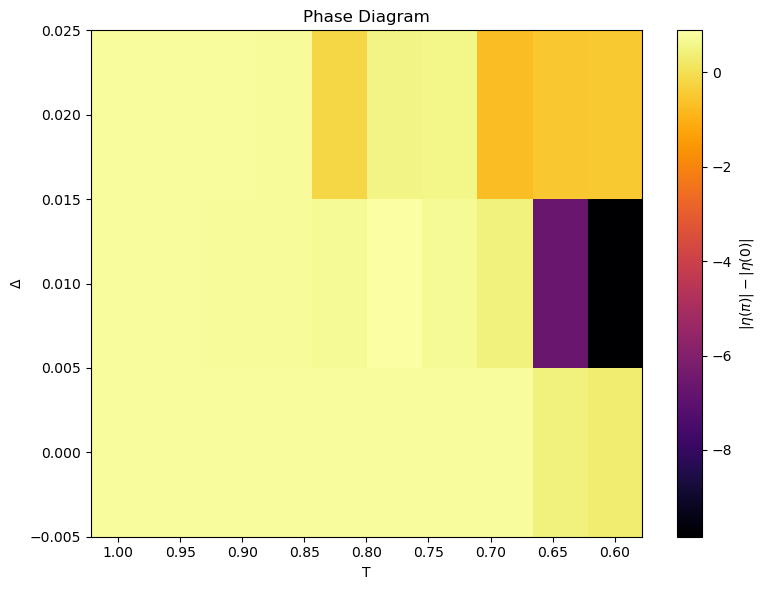

In [ ]:
PD.plot_phase_diagram_fromdatagrid(data_grid, T_list, delta_list)

(4, 10)


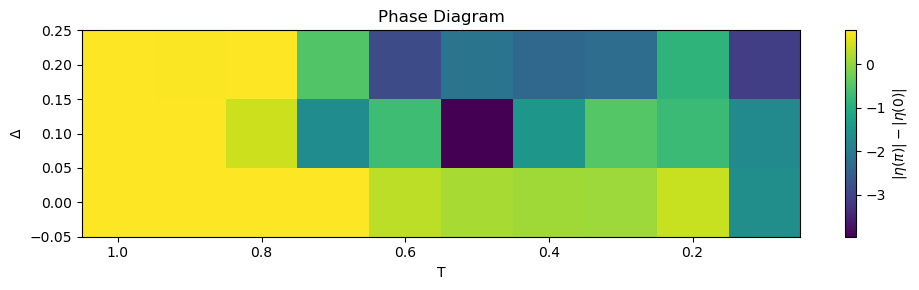

In [ ]:
print(data_grid_fast.shape)
PD.plot_phase_diagram_fromdatagrid(data_grid_fast[:3,:], T_list, delta_list[:3])

Plot order parameter and respective Fourier transform for certain values

In [235]:
# Choose the specific values you're interested in
delta_target = 0
T_target = T_list[9]

# Get indices from mapping
i = delta_list.index(delta_target)
j = T_list.index(T_target)

# Access the dictionary stored at that position
entry = data_grid[i, j]
entry_fast = data_grid_fast[i,j]

# Extract what you want
op_real = entry['op_real']
op_ft = entry['op_ft']

op_real_fast = entry_fast['op_real']
op_ft_fast = entry_fast['op_ft']


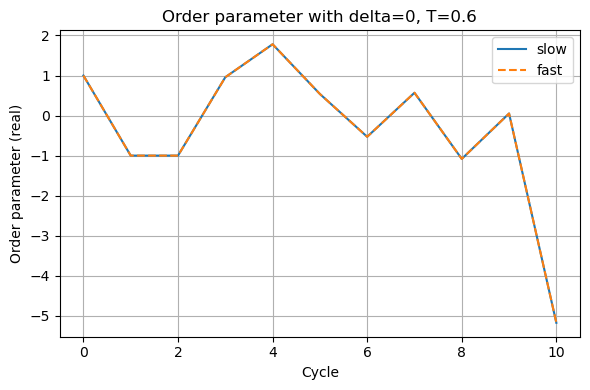

In [236]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(N_cycles+1)[:11], op_real, label="slow")
plt.plot(np.arange(N_cycles+1)[:11], op_real_fast[:11], '--', label = "fast")
plt.xlabel("Cycle")
plt.ylabel("Order parameter (real)")
plt.title(f"Order parameter with delta={delta_target}, T={T_target}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


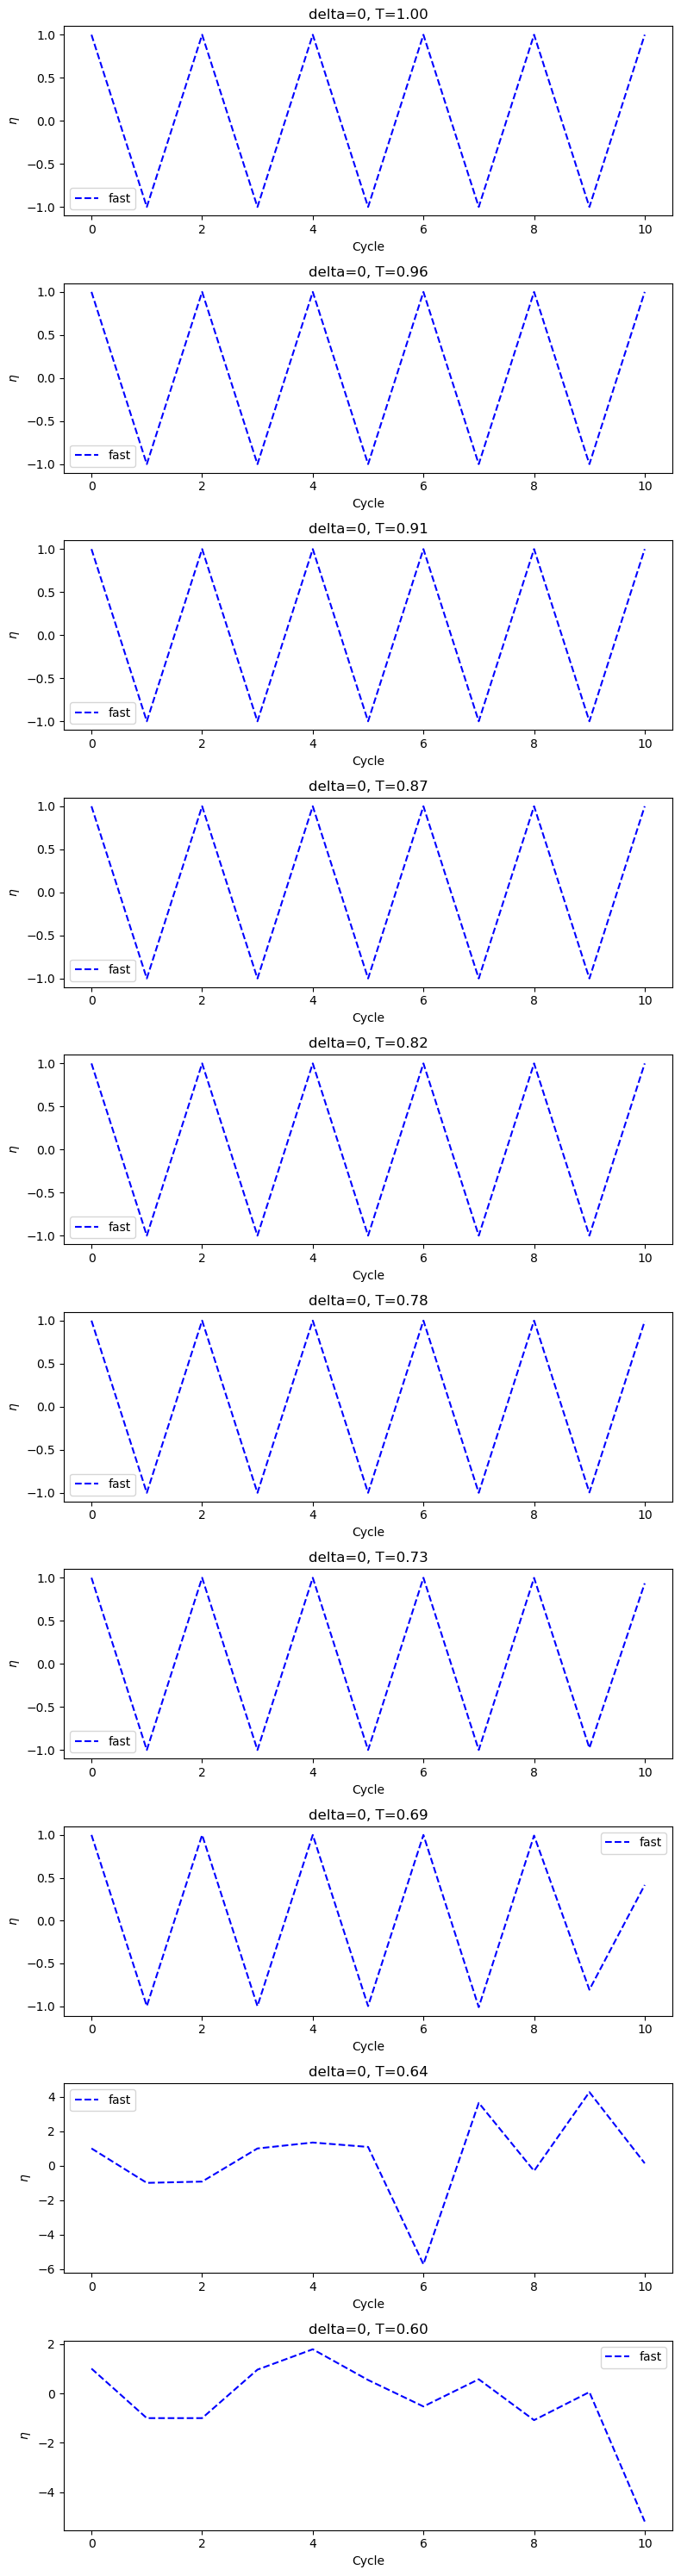

In [252]:
nrows = len(T_list)
ncols = 1 
fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize= (8,nrows*3))

delta_target = 0
i = delta_list.index(delta_target)


for idx, T in enumerate(T_list):
    # Choose the specific values you're interested in

    T_target = T

    # Get indices from mapping
    j = T_list.index(T_target)

    # Access the dictionary stored at that position
    entry = data_grid[i, j]
    entry_fast = data_grid_fast[i,j]

    # Extract what you want
    op_real = entry['op_real']

    op_real_fast = entry_fast['op_real']

    #ax[idx].plot(np.arange(N_cycles+1), op_real, '.-', color = "orange", label= "slow")
    ax[idx].plot(np.arange(N_cycles+1), op_real_fast, '--', color = "blue", label = "fast")
    ax[idx].set_title(f"delta={delta_target}, T={T_target:.2f}")
    ax[idx].set_xlabel("Cycle")
    ax[idx].set_ylabel(r"$\eta$")
    ax[idx].legend()
plt.tight_layout()
plt.show()

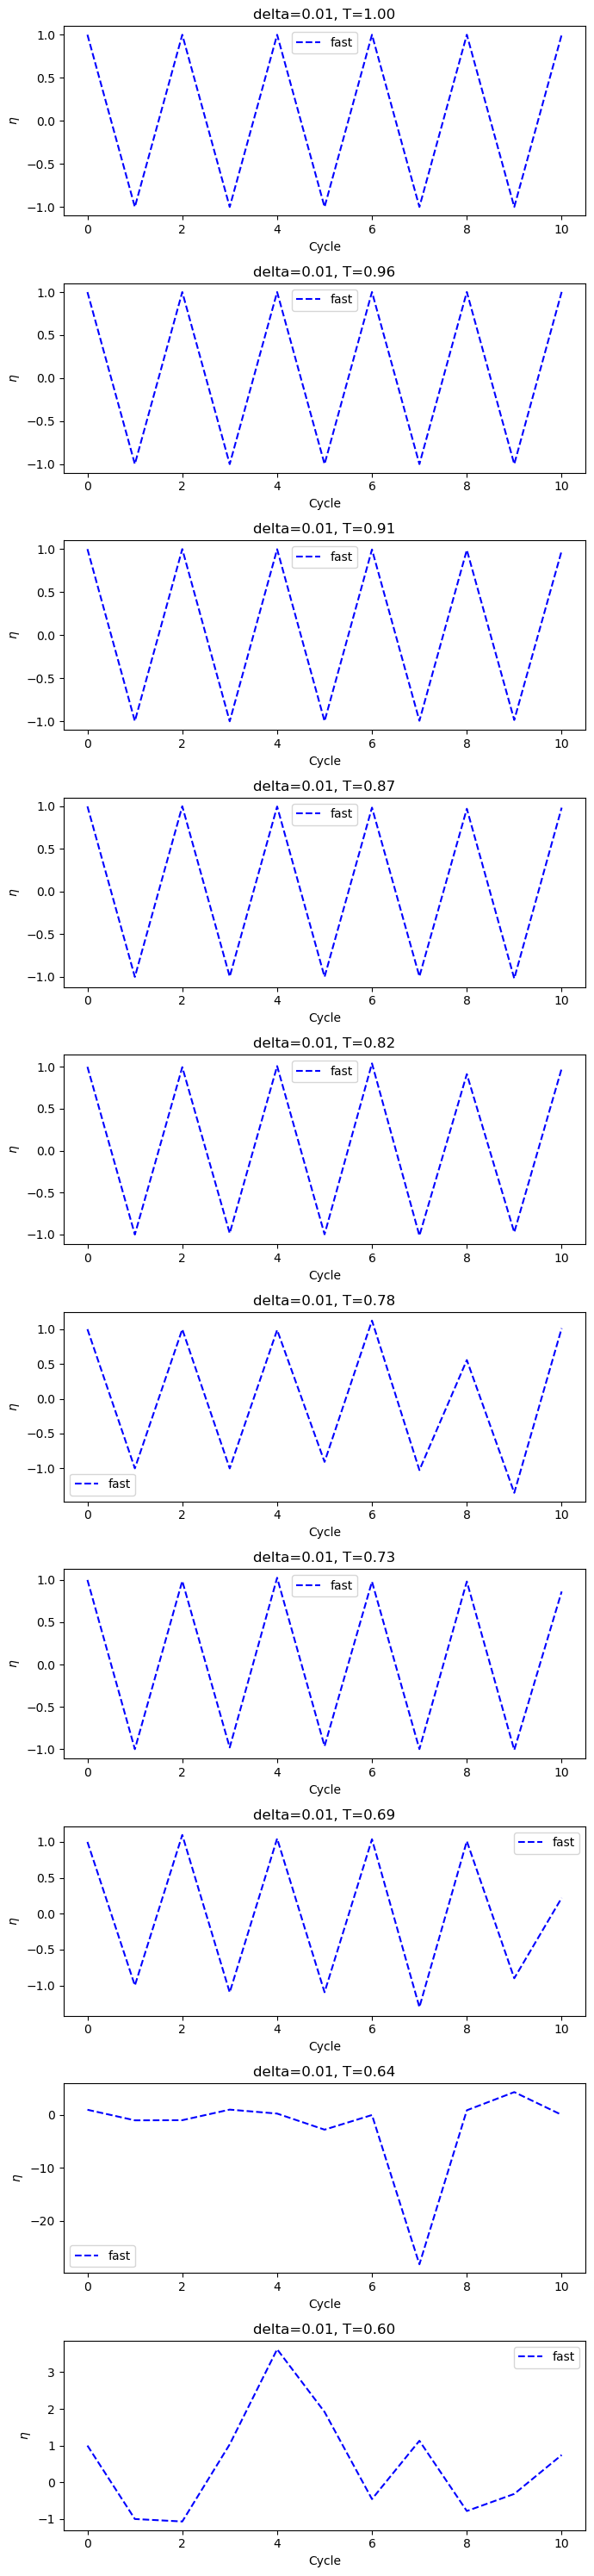

In [267]:
nrows = len(T_list)
ncols = 1 
fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize= (7,nrows*3))

delta_target = 0.01
i = delta_list.index(delta_target)


for idx, T in enumerate(T_list):
    # Choose the specific values you're interested in

    T_target = T

    # Get indices from mapping
    j = T_list.index(T_target)

    # Access the dictionary stored at that position
    #entry = data_grid[i, j]
    entry_fast = data_grid_fast[i,j]

    # Extract what you want
    op_real = entry['op_real']

    op_real_fast = entry_fast['op_real']


# result = []
# for i in range(len(op_real_fast[0])):  # iterate over column indices
#     column = [sublist[i] for sublist in op_real_fast]  # take i-th element from each sublist
#     result.append(np.mean(column))

#same as doing

    result = np.mean(op_real_fast, axis=0)

    #ax[idx].plot(np.arange(N_cycles+1), op_real, '.-', color = "orange", label= "slow")
    ax[idx].plot(np.arange(N_cycles+1), result, '--', color = "blue", label = "fast")
    ax[idx].set_title(f"delta={delta_target}, T={T_target:.2f}")
    ax[idx].set_xlabel("Cycle")
    ax[idx].set_ylabel(r"$\eta$")
    ax[idx].legend()
plt.tight_layout()
plt.show()